# Clonal Growth Rate Analysis: 
    

In [1]:
### Load Libraries
library(data.table) # version 1.14.6

library(dplyr)
## corrected GPT version for missing data
# inverse_rank_normalize <- function(x) {
#  n <- sum(!is.na(x))
#  ranks <- rank(x, na.last = "keep")
#  normalized_values <- (ranks - 0.5) / n 
#  inverse_normalized_values <- qnorm(normalized_values)
#  return(inverse_normalized_values)
# }

### 
  ### source:  https://www.biostars.org/p/80597/ and the supplement of Yang et al. Nature 2012.
INT_yang2012 <- function(x){
  y<-qnorm((rank(x,na.last='keep')-0.5)/sum(!is.na(x)))
  return(y)
}

# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
### All 4,187 Samples w/o Heme CA 
aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids.Jun3May2023.csv", header=T)

nrow(aric_baseline_n_v05)

# Exclude Prev. CH 
# Recalculated INT values in this subset
### Curated dataset for main Epi Analysis
aric_baseline_n_v05.noPrevCH <- fread("aric_baseline_n_v05_N3730.pheno_ch_status.noHemeCA.correct_lipids.FinalDataset_4_glm.July132023.csv", 
                             header=T)
nrow(aric_baseline_n_v05.noPrevCH)

[1] 4187

[1] 3730

In [4]:
### Save files for manual modificaton of Hiseq mutect and hiseq pileup data
cln_grt.vaf2.DP20_base.corrected <- fread("cln_grt.vaf2.DP20_base.relaxd.modified_hiseq.29Nov2023.csv", header=T)
nrow(cln_grt.vaf2.DP20_base.corrected)

cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected <- fread("cln_grt.vaf2.DP20_base.indelAD5FRRR2.modified_hiseq.mild.29Nov2023.csv", header=T)
nrow(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected)

cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected <- fread("cln_grt.vaf2.DP20_base_allAD5FRRR2.modified_hiseq.stringent.29Nov2023.csv", header=T)
nrow(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected)

[1] 1244

[1] 1159

[1] 845

In [7]:
names(cln_grt.vaf2.DP20_base.corrected)

[1] "CHROM_POS_GWAS_VISIT_base" "ARIC_ID"                  
  [3] "varID_GWASID"              "GWAS_ID.x"                
  [5] "CHR"                       "POS"                      
  [7] "REF"                       "ALT"                      
  [9] "Gene"                      "AD.v5"                    
 [11] "VAF.v5"                    "DP.v5"                    
 [13] "AD.Alt.v5"                 "FR.Alt.v5"                
 [15] "RR.Alt.v5"                 "Accession"                
 [17] "transcriptOI"              "NonsynOI"                 
 [19] "Func.refGene"              "ExonicFunc.refGene"       
 [21] "AAChange.refGene"          "AD.v2"                    
 [23] "VAF.v2"                    "DP.v2"                    
 [25] "AD.Alt.v2"                 "FR.Alt.v2"                
 [27] "RR.Alt.v2"                 "Batch"                    
 [29] "dAge"                      "dVAF"                     
 [31] "pctVAF"                    "growth_rate"              
 [33] "log_growth_rate"           "Gene_Group"               
 [35] "Gene_Group_2"              "Clone_status"             
 [37] "Trajectory"                "GWAS_ID.y"                
 [39] "GWASID_Visit"              "cram_id"                  
 [41] "Visit.x"                   "Gender"                   
 [43] "Age"                       "CH_baseline"              
 [45] "CH_v05"                    "incident_CH"              
 [47] "incident_CHvaf05"          "incident_CHvaf10"         
 [49] "incident_DNMT3A"           "incident_TET2"            
 [51] "incident_ASXL1"            "incident_DTA"             
 [53] "incident_SF"               "incident_DDR"             
 [55] "death.x"                   "death_date.x"             
 [57] "hg38_CRAM_ID"              "aricid"                   
 [59] "Visit.y"                   "sex"                      
 [61] "race"                      "center"                   
 [63] "dob"                       "date_base"                
 [65] "age_base"                  "fast_8_base"              
 [67] "bmi_base"                  "dm_126_base"              
 [69] "gluc_base"                 "htn_5_base"               
 [71] "chol_med_base"             "statin_base"              
 [73] "cig_base"                  "chd_date"                 
 [75] "is_date"                   "hs_date"                  
 [77] "hf_date"                   "death.y"                  
 [79] "death_date.y"              "lfu_date"                 
 [81] "chd_base"                  "is_base"                  
 [83] "hs_base"                   "hf_base"                  
 [85] "ever_smoke"                "v2_vs_other"              
 [87] "Sex"                       "race_BW"                  
 [89] "BMI_cat"                   "nonHDL_std"               
 [91] "hdl_base_std"              "ldl_base_std"             
 [93] "chol_base_std"             "tg_base_std"              
 [95] "gluc_base_std"             "bmi_base_std"             
 [97] "CHvaf10_baseline"          "CH_baseline_v05"          
 [99] "CHvaf10_baseline_v05"      "CH_DTA"                   
[101] "CH_SF"                     "CH_DDR"                   
[103] "CH_DNMT3A"                 "CH_TET2"                  
[105] "CH_ASXL1"                  "nonHDL_base_std"          
[107] "age_base_sqr"              "Center"                   
[109] "sbp_base"                  "dbp_base"                 
[111] "hem_can_base"              "hem_can_inc_base"         
[113] "hem_can_int_base"          "hem_can_inc_v5"           
[115] "hem_can_int_v5"            "chol_base"                
[117] "hdl_base"                  "ldl_base"                 
[119] "tg_base"                   "chd_is_base"              
[121] "chol_base_INT"             "ldl_base_INT"             
[123] "hdl_base_INT"              "tg_base_INT"              
[125] "nonHDL_base"               "nonHDL_base_INT"          
[127] "bmi_base_INT"              "tg_to_hdl_base"           
[129] "tg_to_hdl_base_INT"        

In [8]:
summary(cln_grt.vaf2.DP20_base.corrected$Age - cln_grt.vaf2.DP20_base.corrected$age_base)

summary(cln_grt.vaf2.DP20_base.corrected$dAge)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   20.00   21.00   20.36   22.00   27.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   20.00   21.00   20.36   22.00   27.00 

In [9]:
# dVAF
cln_grt.vaf2.DP20_base.corrected$dVAF <- (cln_grt.vaf2.DP20_base.corrected$VAF.v5 - cln_grt.vaf2.DP20_base.corrected$VAF.v2) 

## Define dVAF/dT
cln_grt.vaf2.DP20_base.corrected$dVAF_by_dT <- (cln_grt.vaf2.DP20_base.corrected$VAF.v5 - cln_grt.vaf2.DP20_base.corrected$VAF.v2)/cln_grt.vaf2.DP20_base.corrected$dAge 
summary(cln_grt.vaf2.DP20_base.corrected$dVAF_by_dT)
table(cln_grt.vaf2.DP20_base.corrected$dVAF_by_dT>=0)

## log scale
cln_grt.vaf2.DP20_base.corrected$logdVAF_by_dT <- log(cln_grt.vaf2.DP20_base.corrected$VAF.v5/cln_grt.vaf2.DP20_base.corrected$VAF.v2)/cln_grt.vaf2.DP20_base.corrected$dAge 
summary(cln_grt.vaf2.DP20_base.corrected$logdVAF_by_dT)
table(cln_grt.vaf2.DP20_base.corrected$logdVAF_by_dT>=0)


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.007095  0.002073  0.003526  0.004920  0.006425  0.107129 


FALSE  TRUE 
   69  1175 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.08375  0.05948  0.28426  0.21227  0.33239  1.27467 


FALSE  TRUE 
   69  1175 

In [12]:
table(cln_grt.vaf2.DP20_base.corrected$ExonicFunc.refGene)
table(cln_grt.vaf2.DP20_base.corrected$Func.refGene)

sort(table(cln_grt.vaf2.DP20_base.corrected$NonsynOI[cln_grt.vaf2.DP20_base.corrected$Gene=="DNMT3A"]), decreasing = T)

sort(table(cln_grt.vaf2.DP20_base.corrected$NonsynOI), decreasing = T)


                     .    frameshift deletion   frameshift insertion 
                    90                    201                     82 
nonframeshift deletion      nonsynonymous SNV               stopgain 
                     9                    560                    302 


  exonic splicing 
    1154       90 


             nan            R882H            R882C            R771X 
              58               26               14               11 
           R320X            R326C            R736H            W313X 
               8                8                8                7 
           R326H            R635W            W330X            Y660C 
               5                5                5                5 
           Y735C            F755S            I292S            I780T 
               5                4                4                4 
           P743L            R598X            R635Q            R736C 
               4                4                4                4 
           R749C            V657M            W305X            W327X 
               4                4                4                4 
           G298R            G332R            G543C            N838D 
               3                3                3                3 
           P904L            R556S


             nan            R882H       G646Wfs*12            K700E 
              90               26               16               16 
           R882C           I1873T            R771X            V617F 
              14               12               11                9 
            K57E             P95H             P95L            Q157P 
               8                8                8                8 
           R320X            R326C            R552X            R736H 
               8                8                8                8 
      E635Rfs*15            W313X            K666N            R140Q 
               7                7                6                6 
          E1033X            E342X            R326H            R635W 
               5                5                5                5 
           W330X            Y591X            Y660C            Y735C 
               5                5                5                5 
          D1598N            E523X

In [13]:
cln_grt.vaf2.DP20_base.corrected$Variant_type <- factor(ifelse(cln_grt.vaf2.DP20_base.corrected$ExonicFunc.refGene=="nonsynonymous SNV", 
                                                  "Missense",
                                                  ifelse(cln_grt.vaf2.DP20_base.corrected$ExonicFunc.refGene %in% 
                                                         c("frameshift deletion", "frameshift insertion","nonframeshift deletion"), 
                                                         "INDEL", 
                                                         ifelse(cln_grt.vaf2.DP20_base.corrected$ExonicFunc.refGene == "stopgain", 
                                                                "Stopgain", 
                                                                "Splicing"))), 
                                                        levels = c("Missense", "INDEL","Stopgain", "Splicing"))

table(cln_grt.vaf2.DP20_base.corrected$Variant_type)

sort(table(cln_grt.vaf2.DP20_base.corrected$Gene_Group), decreasing = T)
sort(table(cln_grt.vaf2.DP20_base.corrected$Gene), decreasing = T)


Missense    INDEL Stopgain Splicing 
     560      292      302       90 


DNMT3A   TET2  Other  ASXL1     SF    DDR 
   536    255    224     82     77     70 


DNMT3A   TET2  ASXL1  SF3B1  PPM1D   TP53 ZBTB33 ZNF318  SRSF2  SRCAP  YLPM1 
   536    255     82     40     39     31     25     23     17     14     13 
 BRCC3  STAG2  U2AF1  PDS5B    CBL   GNB1   JAK2    NF1  ZRSR2   IDH2   PHIP 
    12     12     12     11     10      9      9      8      8      7      7 
 ASXL2  KDM6A  PRPF8   CUX1   KRAS   NRAS CREBBP   NXF1   PHF6   PTEN   BCOR 
     6      5      5      4      4      4      3      3      3      3      2 
  BRAF  EP300   EZH2 PTPN11  SUZ12 BCORL1   CBLB   CTCF   ETV6   IDH1  IKZF2 
     2      2      2      2      2      1      1      1      1      1      1 
   KIT    MPL  RAD21  RUNX1 SETBP1  SETD2 
     1      1      1      1      1      1 

In [14]:
table(cln_grt.vaf2.DP20_base.corrected$NonsynOI[cln_grt.vaf2.DP20_base.corrected$Gene=="DNMT3A" & grepl(pattern = "R882", x = cln_grt.vaf2.DP20_base.corrected$NonsynOI)])


R882C R882H R882P 
   14    26     2 

In [15]:
## Gene Gropu: D, T, A, DDR, SF, Other
## DNMT3A_notR882 vs
cln_grt.vaf2.DP20_base.corrected$Gene_Group_R882 <- factor(ifelse(cln_grt.vaf2.DP20_base.corrected$Gene =="DNMT3A" & 
                                                      cln_grt.vaf2.DP20_base.corrected$NonsynOI %in% c("R882C", "R882H", "R882P"), 
                                                    "DNMT3A_R882", 
                                                      ifelse(cln_grt.vaf2.DP20_base.corrected$Gene =="DNMT3A" & 
                                                      !(cln_grt.vaf2.DP20_base.corrected$NonsynOI %in% c("R882C", "R882H", "R882P")), 
                                                             "DNMT3A_nonR882",
                                                             ifelse(cln_grt.vaf2.DP20_base.corrected$Gene=="TET2", 
                                                        "TET2",
                                                        ifelse(cln_grt.vaf2.DP20_base.corrected$Gene=="ASXL1", 
                                                               "ASXL1",
                                                              ifelse(cln_grt.vaf2.DP20_base.corrected$Gene %in% c("PPM1D", "TP53"), 
                                                                     "DDR", 
                                                                     ifelse(cln_grt.vaf2.DP20_base.corrected$Gene %in% c("SF3B1", "SRSF2", "U2AF1", "ZRSR2"), 
                                                                             "SF","Other"))))) ),
                                                          levels= c("DNMT3A_nonR882", "DNMT3A_R882",
                                                                    "TET2", "ASXL1", "DDR", "SF", "Other"))
table(cln_grt.vaf2.DP20_base.corrected$Gene_Group_R882)


DNMT3A_nonR882    DNMT3A_R882           TET2          ASXL1            DDR 
           494             42            255             82             70 
            SF          Other 
            77            224 

In [16]:
(sort(table(cln_grt.vaf2.DP20_base.corrected$Gene[cln_grt.vaf2.DP20_base.corrected$Gene!="DNMT3A"]), decreasing = T))
names(sort(table(cln_grt.vaf2.DP20_base.corrected$Gene[cln_grt.vaf2.DP20_base.corrected$Gene!="DNMT3A"]), decreasing = T))


  TET2  ASXL1  SF3B1  PPM1D   TP53 ZBTB33 ZNF318  SRSF2  SRCAP  YLPM1  BRCC3 
   255     82     40     39     31     25     23     17     14     13     12 
 STAG2  U2AF1  PDS5B    CBL   GNB1   JAK2    NF1  ZRSR2   IDH2   PHIP  ASXL2 
    12     12     11     10      9      9      8      8      7      7      6 
 KDM6A  PRPF8   CUX1   KRAS   NRAS CREBBP   NXF1   PHF6   PTEN   BCOR   BRAF 
     5      5      4      4      4      3      3      3      3      2      2 
 EP300   EZH2 PTPN11  SUZ12 BCORL1   CBLB   CTCF   ETV6   IDH1  IKZF2    KIT 
     2      2      2      2      1      1      1      1      1      1      1 
   MPL  RAD21  RUNX1 SETBP1  SETD2 
     1      1      1      1      1 

[1] "TET2"   "ASXL1"  "SF3B1"  "PPM1D"  "TP53"   "ZBTB33" "ZNF318" "SRSF2" 
 [9] "SRCAP"  "YLPM1"  "BRCC3"  "STAG2"  "U2AF1"  "PDS5B"  "CBL"    "GNB1"  
[17] "JAK2"   "NF1"    "ZRSR2"  "IDH2"   "PHIP"   "ASXL2"  "KDM6A"  "PRPF8" 
[25] "CUX1"   "KRAS"   "NRAS"   "CREBBP" "NXF1"   "PHF6"   "PTEN"   "BCOR"  
[33] "BRAF"   "EP300"  "EZH2"   "PTPN11" "SUZ12"  "BCORL1" "CBLB"   "CTCF"  
[41] "ETV6"   "IDH1"   "IKZF2"  "KIT"    "MPL"    "RAD21"  "RUNX1"  "SETBP1"
[49] "SETD2"

In [17]:
cln_grt.vaf2.DP20_base.corrected$Gene_R882 <- factor(ifelse(cln_grt.vaf2.DP20_base.corrected$Gene =="DNMT3A" & 
                                                      cln_grt.vaf2.DP20_base.corrected$NonsynOI %in% c("R882C", "R882H", "R882P"), 
                                                    "DNMT3A_R882", 
                                                      ifelse(cln_grt.vaf2.DP20_base.corrected$Gene =="DNMT3A" & 
                                                      !(cln_grt.vaf2.DP20_base.corrected$NonsynOI %in% c("R882C", "R882H", "R882P")), 
                                                             "DNMT3A_nonR882", cln_grt.vaf2.DP20_base.corrected$Gene)),
                                                    levels=c("DNMT3A_nonR882", 
                                                             "DNMT3A_R882", 
                                                             names(sort(table(cln_grt.vaf2.DP20_base.corrected$Gene[cln_grt.vaf2.DP20_base.corrected$Gene!="DNMT3A"]), decreasing = T
                                                                       ))))
                                                            
                                                             
table(cln_grt.vaf2.DP20_base.corrected$Gene_R882)


DNMT3A_nonR882    DNMT3A_R882           TET2          ASXL1          SF3B1 
           494             42            255             82             40 
         PPM1D           TP53         ZBTB33         ZNF318          SRSF2 
            39             31             25             23             17 
         SRCAP          YLPM1          BRCC3          STAG2          U2AF1 
            14             13             12             12             12 
         PDS5B            CBL           GNB1           JAK2            NF1 
            11             10              9              9              8 
         ZRSR2           IDH2           PHIP          ASXL2          KDM6A 
             8              7              7              6              5 
         PRPF8           CUX1           KRAS           NRAS         CREBBP 
             5              4              4              4              3 
          NXF1           PHF6           PTEN           BCOR           BRAF 
           

In [18]:
table(cln_grt.vaf2.DP20_base.corrected$Batch,cln_grt.vaf2.DP20_base.corrected$CH_method, exclude = NULL)

cln_grt.vaf2.DP20_base.corrected$is_notHiSeq <- ifelse(cln_grt.vaf2.DP20_base.corrected$Batch=="RepeatSeq", 
                                                       1,0)
table(cln_grt.vaf2.DP20_base.corrected$is_notHiSeq)
cln_grt.vaf2.DP20_base.corrected$is_notMUTECT <- ifelse(cln_grt.vaf2.DP20_base.corrected$CH_method!="MUTECT", 
                                                        1,0)

table(cln_grt.vaf2.DP20_base.corrected$is_notMUTECT)

table(cln_grt.vaf2.DP20_base.corrected$Batch, 
      cln_grt.vaf2.DP20_base.corrected$is_notMUTECT)

table(cln_grt.vaf2.DP20_base.corrected$is_notHiSeq, 
      cln_grt.vaf2.DP20_base.corrected$is_notMUTECT, exclude=NULL)

           
            IGV MUTECT Pileup
  Hiseq       2    178      0
  Pileup      0      0    994
  RepeatSeq   5     65      0


   0    1 
1174   70 


   0    1 
 243 1001 

           
              0   1
  Hiseq     178   2
  Pileup      0 994
  RepeatSeq  65   5

   
      0   1
  0 178 996
  1  65   5

In [19]:
table(table(cln_grt.vaf2.DP20_base.corrected$GWASID_Visit))

table(table(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected$GWASID_Visit))

table(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected$GWASID_Visit))


  1   2   3   4 
818 165  24   6 


  1   2   3   4 
786 146  19   6 


  1   2   3   4 
587 106  10   4 

In [20]:
table(table(cln_grt.vaf2.DP20_base.corrected$varID_GWASID, exclude = NULL), exclude = NULL)


   1 
1244 

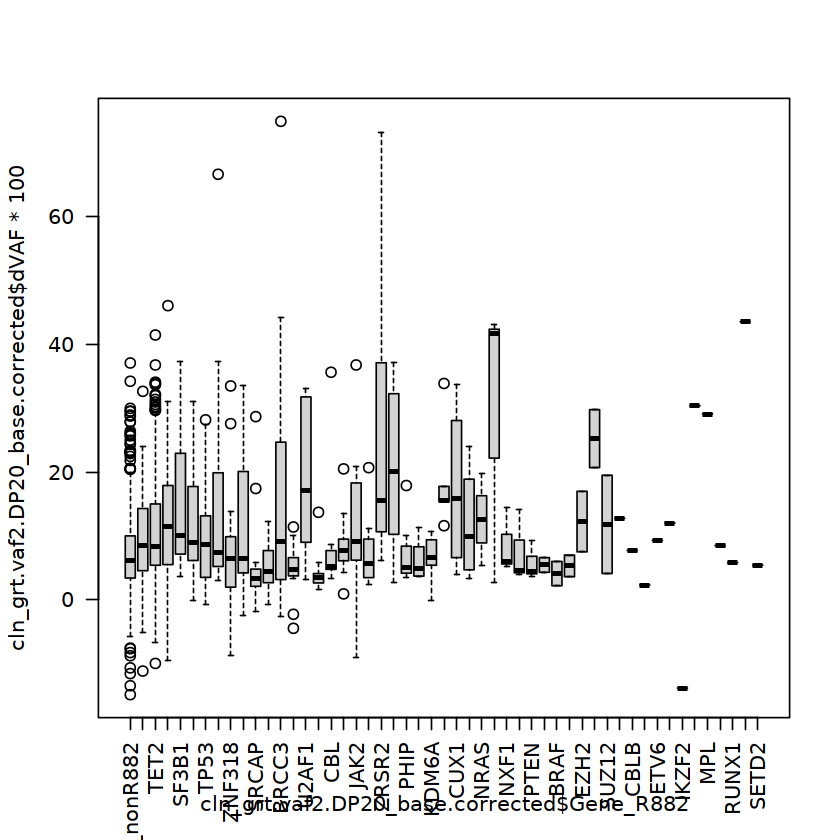

In [21]:
boxplot(cln_grt.vaf2.DP20_base.corrected$dVAF*100 ~ cln_grt.vaf2.DP20_base.corrected$Gene_R882, las=2)

## 1.1 Main Analysis:

* Only Keep variants with +ve dVAF

* Single clone individuals + dominat clone (max dVAF) for individual's with multiple clones


In [22]:
table(cln_grt.vaf2.DP20_base.corrected$dVAF_by_dT>=0, exclude=NULL)
table(table(cln_grt.vaf2.DP20_base.corrected$ARIC_ID[cln_grt.vaf2.DP20_base.corrected$dVAF_by_dT>=0], exclude=NULL))


FALSE  TRUE 
   69  1175 


  1   2   3   4 
782 156  23   3 

In [23]:
## keep dVAF>=0
## single clone per individual
cln_grt.vaf2.DP20_base.corrected_ordered <- subset(cln_grt.vaf2.DP20_base.corrected, 
                                                   cln_grt.vaf2.DP20_base.corrected$dVAF_by_dT>=0)

nrow(cln_grt.vaf2.DP20_base.corrected_ordered)
table(table(cln_grt.vaf2.DP20_base.corrected_ordered$ARIC_ID))
      
cln_grt.vaf2.DP20_base.corrected_ordered <- cln_grt.vaf2.DP20_base.corrected_ordered[
    order(cln_grt.vaf2.DP20_base.corrected_ordered$ARIC_ID, 
          cln_grt.vaf2.DP20_base.corrected_ordered$dVAF_by_dT,
          decreasing = T), ]

cln_grt.vaf2.DP20_base.corrected_ordered <- cln_grt.vaf2.DP20_base.corrected_ordered[!duplicated(cln_grt.vaf2.DP20_base.corrected_ordered$ARIC_ID), ] 

table(table(cln_grt.vaf2.DP20_base.corrected$ARIC_ID[cln_grt.vaf2.DP20_base.corrected$dVAF_by_dT>=0], exclude=NULL))
table(table(cln_grt.vaf2.DP20_base.corrected_ordered$ARIC_ID,exclude=NULL))
table(table(cln_grt.vaf2.DP20_base.corrected_ordered$ARIC_ID[cln_grt.vaf2.DP20_base.corrected_ordered$dVAF_by_dT>=0], exclude=NULL))

[1] 1175


  1   2   3   4 
782 156  23   3 


  1   2   3   4 
782 156  23   3 


  1 
964 


  1 
964 

In [24]:
### Create other files
nrow(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected)
cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered <- subset(cln_grt.vaf2.DP20_base.corrected_ordered, 
                                                         cln_grt.vaf2.DP20_base.corrected_ordered$varID_GWASID %in% 
                                                         cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected$varID_GWASID)

nrow(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered)

nrow(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected)
cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered <- subset(cln_grt.vaf2.DP20_base.corrected_ordered, 
                                                         cln_grt.vaf2.DP20_base.corrected_ordered$varID_GWASID %in% 
                                                         cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected$varID_GWASID)
nrow(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered)

[1] 1159

[1] 900

[1] 845

[1] 658

In [25]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered$dVAF_by_dT)
summary(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered$dVAF_by_dT)
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$dVAF_by_dT)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.002376 0.003845 0.005443 0.006808 0.107129 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.002376 0.003955 0.005570 0.006914 0.107129 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.002978 0.004995 0.006588 0.008556 0.107129 

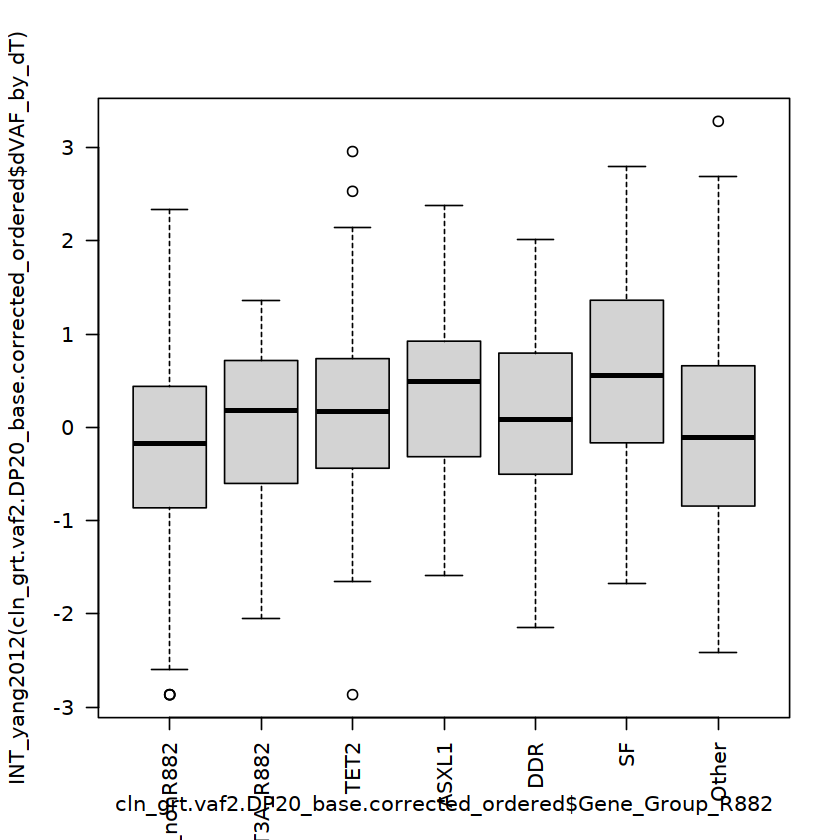

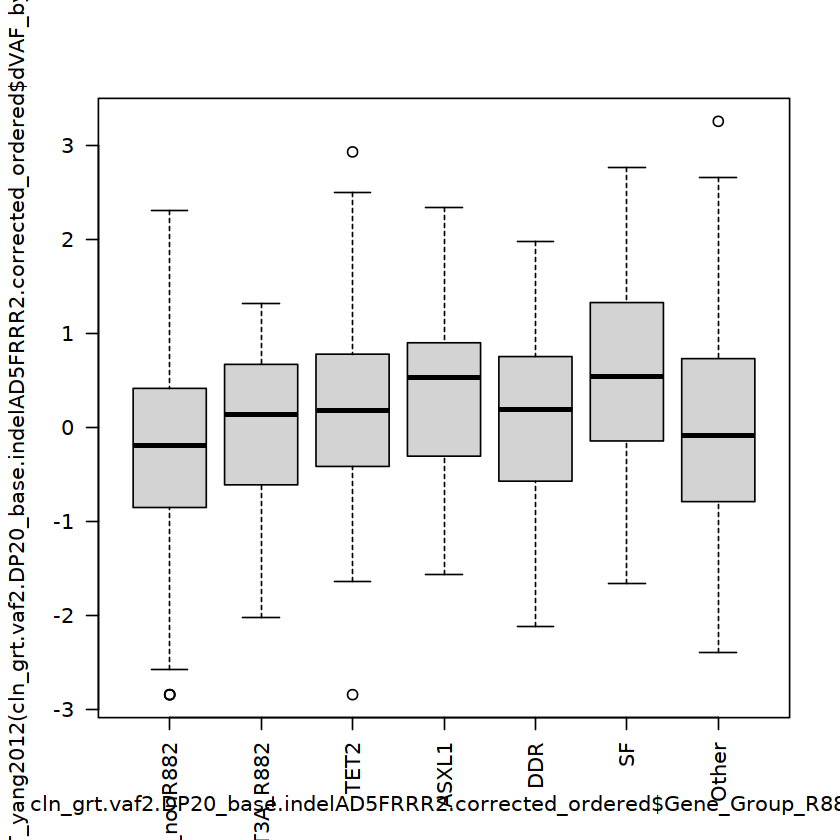

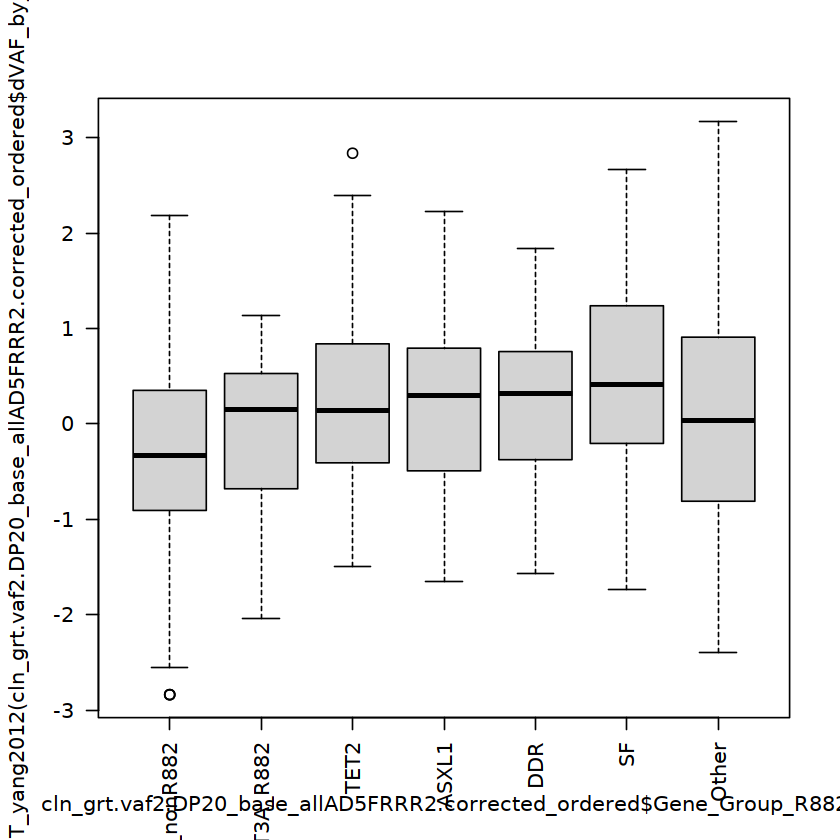

In [26]:
boxplot(INT_yang2012(cln_grt.vaf2.DP20_base.corrected_ordered$dVAF_by_dT) ~ 
        cln_grt.vaf2.DP20_base.corrected_ordered$Gene_Group_R882,  las=2)

boxplot(INT_yang2012(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered$dVAF_by_dT) ~ 
        cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered$Gene_Group_R882,  las=2)

boxplot(INT_yang2012(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$dVAF_by_dT) ~ 
        cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene_Group_R882, las=2)


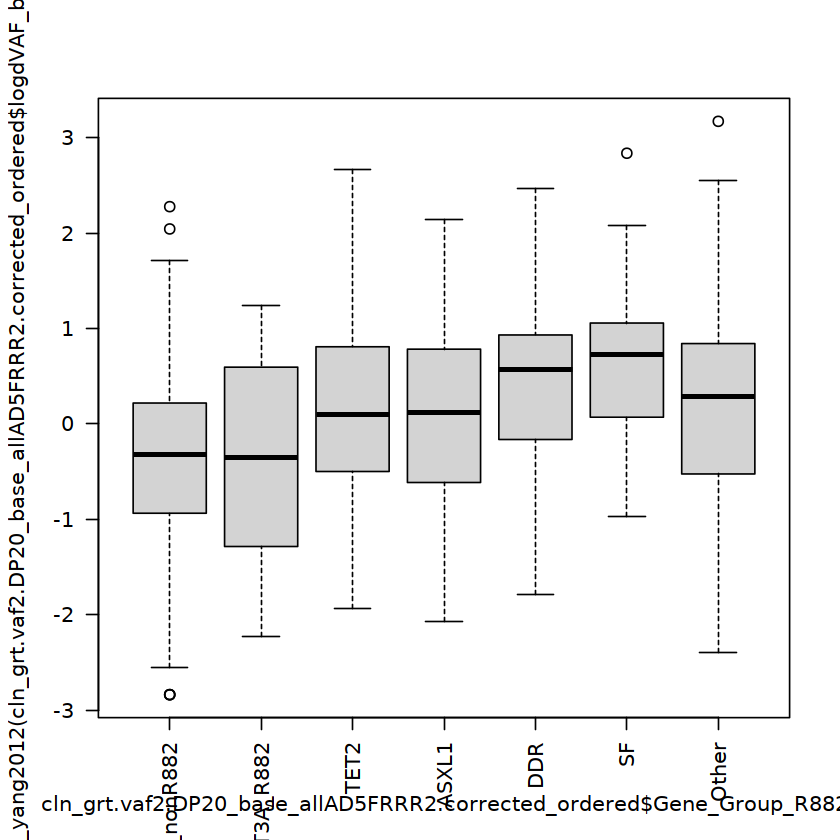

In [27]:
boxplot(INT_yang2012(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$logdVAF_by_dT) ~ 
        cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene_Group_R882, las=2)

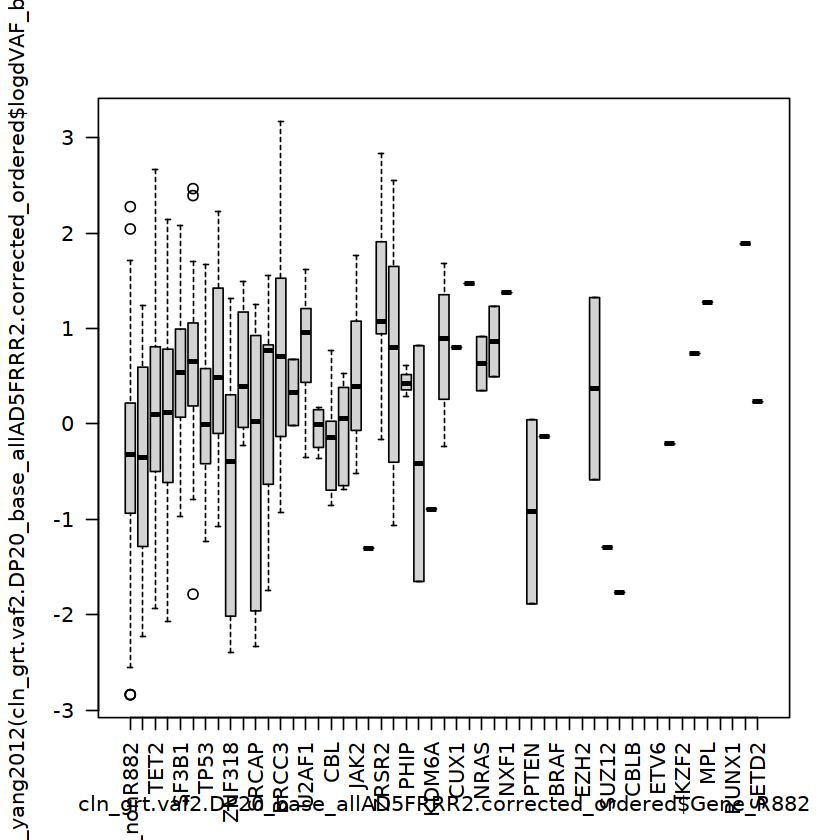

In [28]:
boxplot(INT_yang2012(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$logdVAF_by_dT) ~ 
        cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene_R882, las=2)

In [43]:
ls()
ncol(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered)
ncol(cln_grt.vaf2.DP20_base.corrected_ordered)

[1] "INT_yang2012"                                          
[2] "aric_baseline_n_v05"                                   
[3] "aric_baseline_n_v05.noPrevCH"                          
[4] "cln_grt.vaf2.DP20_base.corrected"                      
[5] "cln_grt.vaf2.DP20_base.corrected_ordered"              
[6] "cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected"        
[7] "cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered"
[8] "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected"          
[9] "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered"

[1] 189

[1] 189


DNMT3A   TET2  ASXL1  SF3B1  PPM1D  SRSF2   TP53 ZBTB33 ZNF318  BRCC3 
   292    127     53     31     23     11     11     11     11      8 

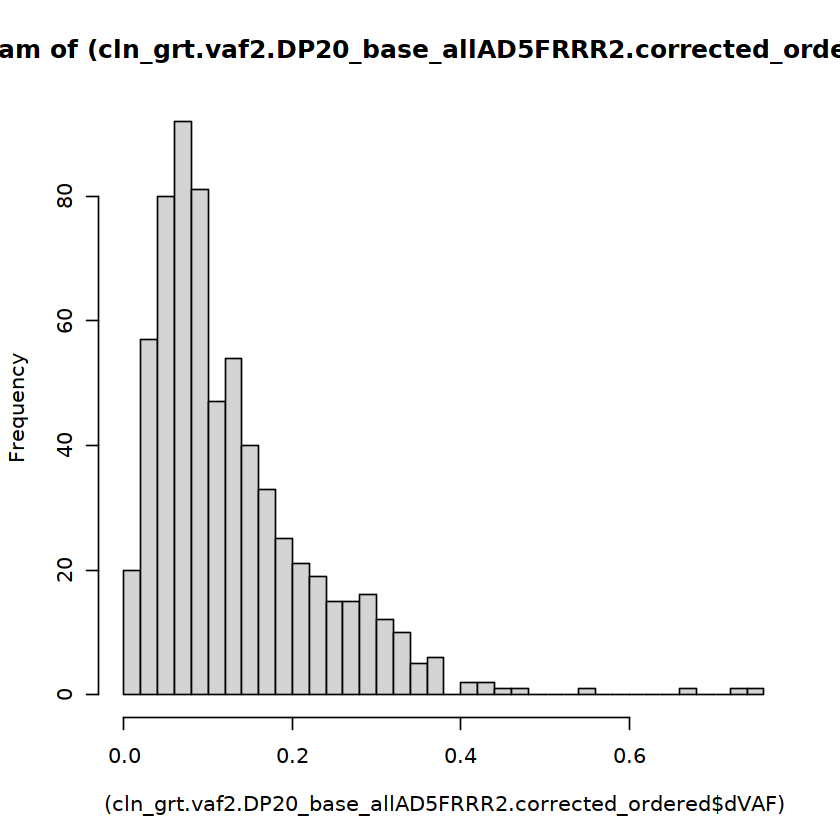

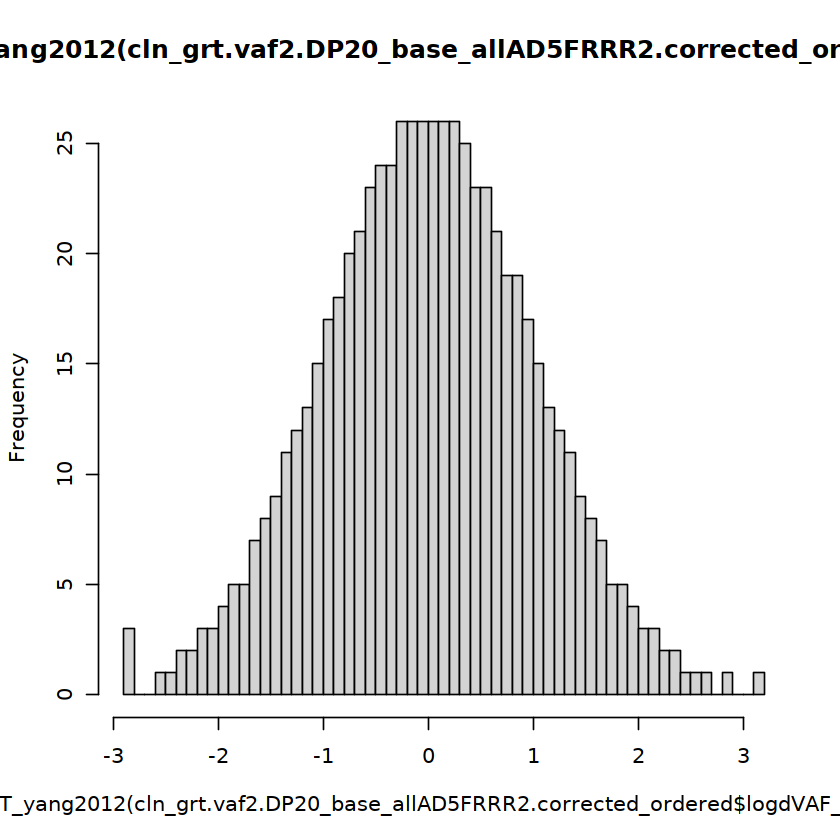

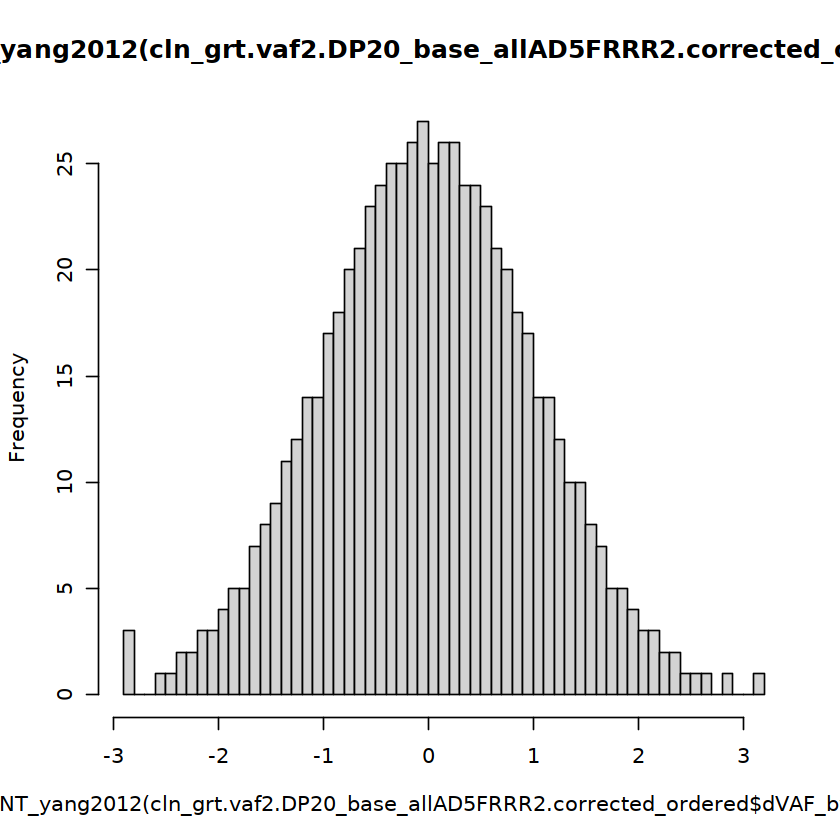

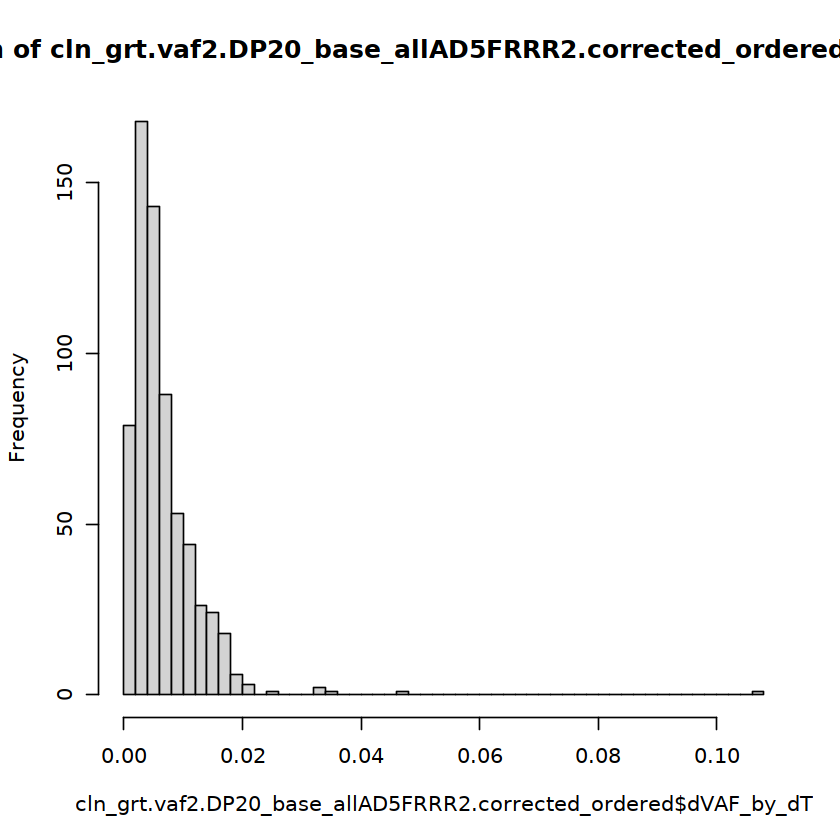

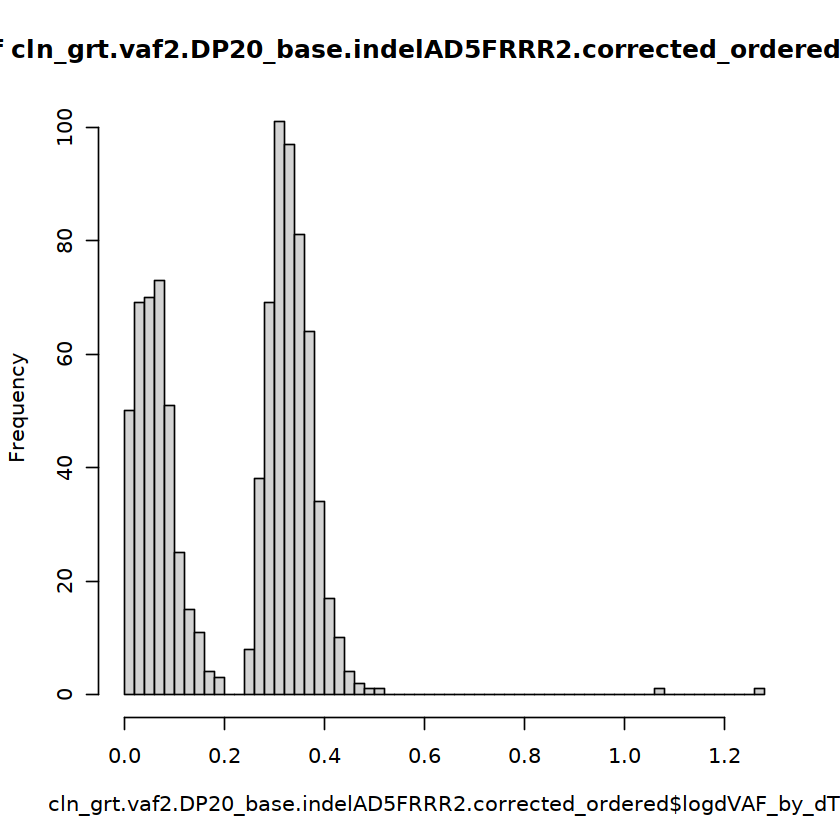

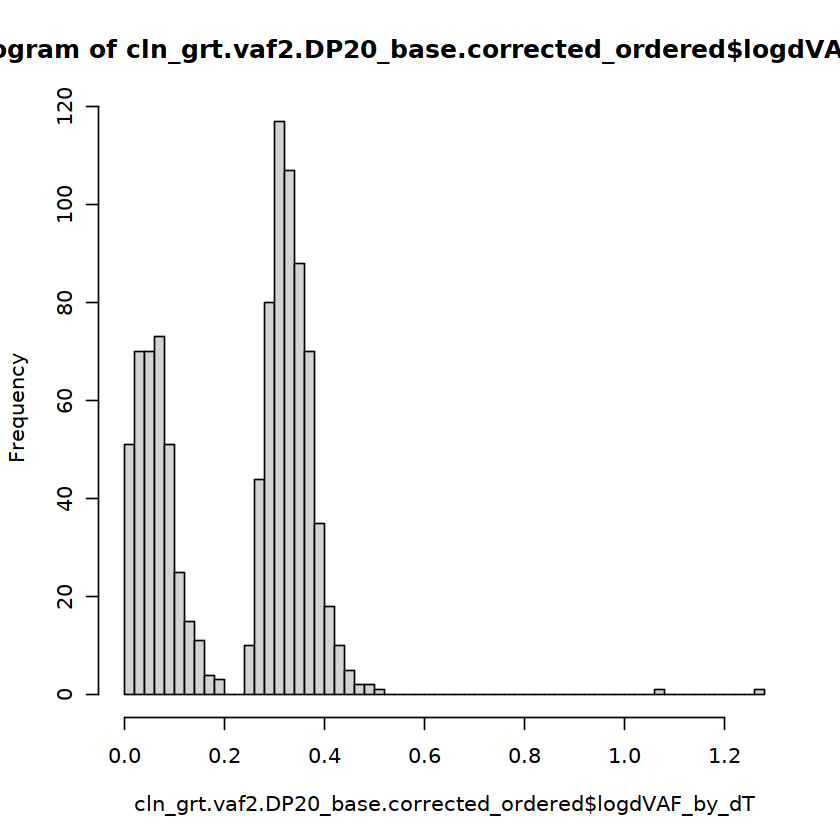

In [45]:
head(sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene), decreasing = T), 10)
hist((cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$dVAF), breaks = 50)
hist(INT_yang2012(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$logdVAF_by_dT), breaks = 50)
hist(INT_yang2012(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$dVAF_by_dT), breaks = 50)
hist(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$dVAF_by_dT, breaks = 50)

hist(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered$logdVAF_by_dT, breaks = 50)


hist(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT, breaks = 50)

In [32]:
# save.image(file="Expansion_rate_input_data.01Dec2023.rda")

# write.csv(cln_grt.vaf2.DP20_base.corrected_ordered,
  #        "cln_grt.vaf2.DP20_base.corrected_ordered.01Dec2023.csv", row.names=F)

# write.csv(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered,
  #        "cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered.01Dec2023.csv", row.names=F)

# write.csv(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered,
  #        "cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered.01Dec2023.csv", row.names=F)

In [2]:
load("Expansion_rate_input_data.01Dec2023.rda")

In [3]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age <70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base<70)])
            
summary(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age >=70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base>=70)])


wilcox.test(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age <70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base<70)],
            
        cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age >=70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base>=70)],
           alternative = "two.sided")

wilcox.test(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age <70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base<70)],
            
        cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age >=70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base>=70)], alternative = "two.sided")$p.value


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.02879 0.05370 0.09210 0.08484 0.41207 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07444 0.29388 0.22947 0.33838 1.27467 


	Wilcoxon rank sum test with continuity correction

data:  cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age < 70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5 >= 0.02) | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2 >= 0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base < 70)] and cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age >= 70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5 >= 0.02) | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2 >= 0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base >= 70)]
W = 65848, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


[1] 1.129652e-43

[1] 1.141374e-141

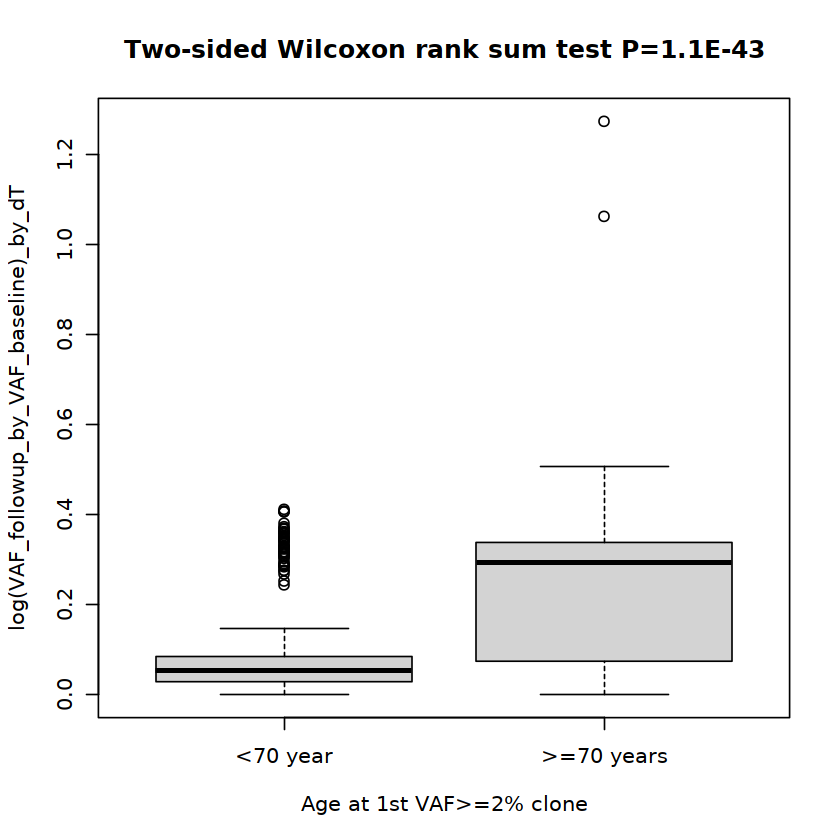

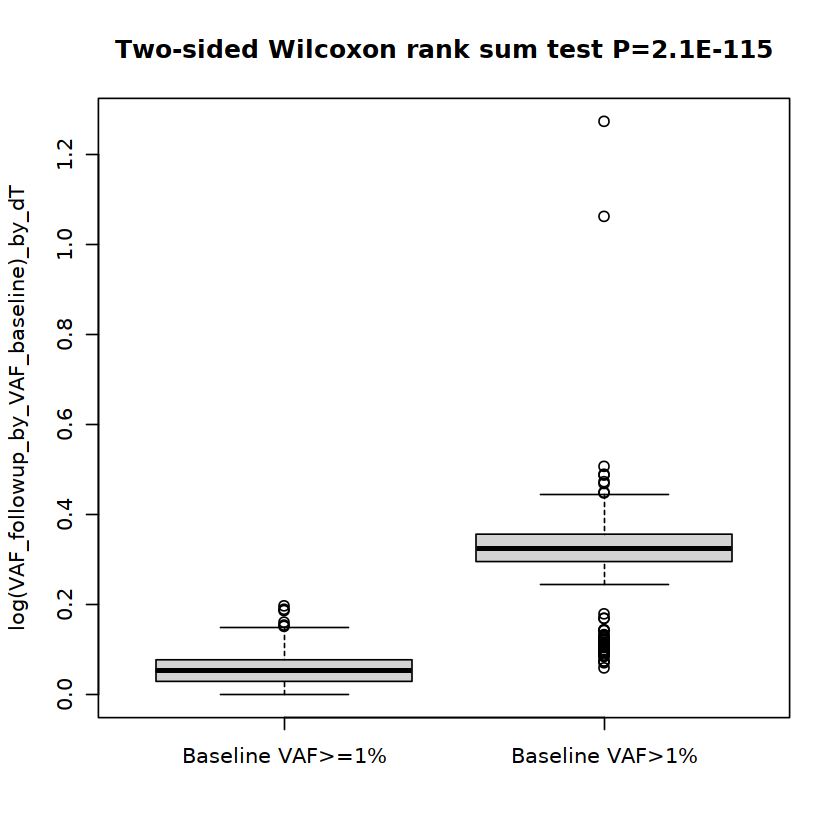

In [33]:
#boxplot(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age <70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
 #                                                      | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base<70)])

#boxplot(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age >=70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
 #                                                      | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base>=70)]) 


            
            
boxplot(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age <70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base<70)],
        cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[(cln_grt.vaf2.DP20_base.corrected_ordered$Age >=70 & cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5>=0.02) 
                                                       | (cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.02 & cln_grt.vaf2.DP20_base.corrected_ordered$age_base>=70)], 
        names=c("<70 year", ">=70 years"), 
        xlab="Age at 1st VAF>=2% clone", 
        ylab="log(VAF_followup_by_VAF_baseline)_by_dT", 
        main="Two-sided Wilcoxon rank sum test P=1.1E-43")


## VAF 2% at base
wilcox.test(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.01 ],
        cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2<0.01])$p.value 

boxplot(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2>=0.01 ],
        cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT[cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2<0.01], 
        names=c("Baseline VAF>=1%", "Baseline VAF<1%"), 
        xlab="", 
        ylab="log(VAF_followup_by_VAF_baseline)_by_dT", 
        main="Two-sided Wilcoxon rank sum test P=1.1E-141")




In [29]:
names(cln_grt.vaf2.DP20_base.corrected_ordered)

[1] "CHROM_POS_GWAS_VISIT_base" "ARIC_ID"                  
  [3] "varID_GWASID"              "GWAS_ID.x"                
  [5] "CHR"                       "POS"                      
  [7] "REF"                       "ALT"                      
  [9] "Gene"                      "AD.v5"                    
 [11] "VAF.v5"                    "DP.v5"                    
 [13] "AD.Alt.v5"                 "FR.Alt.v5"                
 [15] "RR.Alt.v5"                 "Accession"                
 [17] "transcriptOI"              "NonsynOI"                 
 [19] "Func.refGene"              "ExonicFunc.refGene"       
 [21] "AAChange.refGene"          "AD.v2"                    
 [23] "VAF.v2"                    "DP.v2"                    
 [25] "AD.Alt.v2"                 "FR.Alt.v2"                
 [27] "RR.Alt.v2"                 "Batch"                    
 [29] "dAge"                      "dVAF"                     
 [31] "pctVAF"                    "growth_rate"              
 [33] "log_growth_rate"           "Gene_Group"               
 [35] "Gene_Group_2"              "Clone_status"             
 [37] "Trajectory"                "GWAS_ID.y"                
 [39] "GWASID_Visit"              "cram_id"                  
 [41] "Visit.x"                   "Gender"                   
 [43] "Age"                       "CH_baseline"              
 [45] "CH_v05"                    "incident_CH"              
 [47] "incident_CHvaf05"          "incident_CHvaf10"         
 [49] "incident_DNMT3A"           "incident_TET2"            
 [51] "incident_ASXL1"            "incident_DTA"             
 [53] "incident_SF"               "incident_DDR"             
 [55] "death.x"                   "death_date.x"             
 [57] "hg38_CRAM_ID"              "aricid"                   
 [59] "Visit.y"                   "sex"                      
 [61] "race"                      "center"                   
 [63] "dob"                       "date_base"                
 [65] "age_base"                  "fast_8_base"              
 [67] "bmi_base"                  "dm_126_base"              
 [69] "gluc_base"                 "htn_5_base"               
 [71] "chol_med_base"             "statin_base"              
 [73] "cig_base"                  "chd_date"                 
 [75] "is_date"                   "hs_date"                  
 [77] "hf_date"                   "death.y"                  
 [79] "death_date.y"              "lfu_date"                 
 [81] "chd_base"                  "is_base"                  
 [83] "hs_base"                   "hf_base"                  
 [85] "ever_smoke"                "v2_vs_other"              
 [87] "Sex"                       "race_BW"                  
 [89] "BMI_cat"                   "nonHDL_std"               
 [91] "hdl_base_std"              "ldl_base_std"             
 [93] "chol_base_std"             "tg_base_std"              
 [95] "gluc_base_std"             "bmi_base_std"             
 [97] "CHvaf10_baseline"          "CH_baseline_v05"          
 [99] "CHvaf10_baseline_v05"      "CH_DTA"                   
[101] "CH_SF"                     "CH_DDR"                   
[103] "CH_DNMT3A"                 "CH_TET2"                  
[105] "CH_ASXL1"                  "nonHDL_base_std"          
[107] "age_base_sqr"              "Center"                   
[109] "sbp_base"                  "dbp_base"                 
[111] "hem_can_base"              "hem_can_inc_base"         
[113] "hem_can_int_base"          "hem_can_inc_v5"           
[115] "hem_can_int_v5"            "chol_base"                
[117] "hdl_base"                  "ldl_base"                 
[119] "tg_base"                   "chd_is_base"              
[121] "chol_base_INT"             "ldl_base_INT"             
[123] "hdl_base_INT"              "tg_base_INT"              
[125] "nonHDL_base"               "nonHDL_base_INT"          
[127] "bmi_base_INT"              "tg_to_hdl_base"           
[129] "tg_to_hdl_base_INT"        

In [5]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered$DP.v5)
summary(cln_grt.vaf2.DP20_base.corrected_ordered$DP.v2)

1/summary(cln_grt.vaf2.DP20_base.corrected_ordered$DP.v2)*100

table(cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2==1e-4)
cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2 <- cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2
cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2[cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2==1e-4] <- 0.001

summary(cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2)
summary(cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2)

cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT_ver2 <- log(cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v5/cln_grt.vaf2.DP20_base.corrected_ordered$VAF.v2_v2)/cln_grt.vaf2.DP20_base.corrected_ordered$dAge

summary(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT)
summary(cln_grt.vaf2.DP20_base.corrected_ordered$logdVAF_by_dT_ver2)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   25.0    72.0    99.0   115.1   145.0   401.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   42.00   63.50   74.55   91.00  464.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 5.0000  2.3810  1.5748  1.3413  1.0989  0.2155 


FALSE  TRUE 
  373   591 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.02503 0.02381 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00100 0.00100 0.00100 0.02558 0.02381 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07376 0.29399 0.22956 0.33841 1.27467 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07376 0.18629 0.15973 0.22457 0.94572 

In [18]:
######## Main Analysis: overall genes with >=10 clones
model1 <- cln_grt.vaf2.DP20_base.corrected_ordered %>%     
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_Group_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +   chol_med_base +         
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) 

summary(model1)

mod1_dat <- as.data.frame(summary(model1)$coefficients, stringsAsFactors = F)
names(mod1_dat) <- c("Estimate", "SE","t", "P")
mod1_dat$Exposures <- row.names(mod1_dat)
str(mod1_dat)

mod1_dat$beta <- round(mod1_dat$Estimate, 3)

mod1_dat$beta_CI95 <- paste0(mod1_dat$beta, " [",formatC(round(( mod1_dat$Estimate - 1.96 * mod1_dat$SE),3), 
                                                         digits = 3, format = "f"),
                                     ", ",
                                     formatC(round(( mod1_dat$Estimate + 1.96 * mod1_dat$SE),3), 
                                             digits = 3, format = "f"), 
                                     "]")
mod1_dat$P_val <- formatC(x = mod1_dat$P, digits = 1,format = "E")

(mod1_dat)


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_Group_R882 + 
    Variant_type + Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + chd_is_base + age_base + dAge + chol_med_base + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55437 -0.41275 -0.00827  0.37666  1.66478 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.5217415  0.3941346   1.324  0.18592    
Gene_Group_R882DNMT3A_R882  0.0978777  0.1020299   0.959  0.33766    
Gene_Group_R882TET2         0.2235511  0.0546679   4.089 4.72e-05 ***
Gene_Group_R882ASXL1        0.2116325  0.0828646   2.554  0.01081 *  
Gene_Group_R882DDR          0.2136846  0.0821499   2.601  0.00944 ** 
Gene_Group_R882SF           0.4675767  0.0815751   5.732 1.36e-08 ***
Gene_

'data.frame':	30 obs. of  5 variables:
 $ Estimate : num  0.5217 0.0979 0.2236 0.2116 0.2137 ...
 $ SE       : num  0.3941 0.102 0.0547 0.0829 0.0821 ...
 $ t        : num  1.324 0.959 4.089 2.554 2.601 ...
 $ P        : num  1.86e-01 3.38e-01 4.72e-05 1.08e-02 9.44e-03 ...
 $ Exposures: chr  "(Intercept)" "Gene_Group_R882DNMT3A_R882" "Gene_Group_R882TET2" "Gene_Group_R882ASXL1" ...


,Estimate,SE,t,P,Exposures,beta,beta_CI95,P_val
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
(Intercept),0.5217414664,0.394134630,1.32376459,1.859177e-01,(Intercept),0.522,"0.522 [-0.251, 1.294]",1.9E-01
Gene_Group_R882DNMT3A_R882,0.0978776574,0.102029946,0.95930323,3.376639e-01,Gene_Group_R882DNMT3A_R882,0.098,"0.098 [-0.102, 0.298]",3.4E-01
Gene_Group_R882TET2,0.2235511317,0.054667880,4.08925921,4.715407e-05,Gene_Group_R882TET2,0.224,"0.224 [0.116, 0.331]",4.7E-05
Gene_Group_R882ASXL1,0.2116325237,0.082864578,2.55395645,1.081459e-02,Gene_Group_R882ASXL1,0.212,"0.212 [0.049, 0.374]",1.1E-02
Gene_Group_R882DDR,0.2136845908,0.082149898,2.60115466,9.443721e-03,Gene_Group_R882DDR,0.214,"0.214 [0.053, 0.375]",9.4E-03
Gene_Group_R882SF,0.4675767190,0.081575096,5.73185622,1.355437e-08,Gene_Group_R882SF,0.468,"0.468 [0.308, 0.627]",1.4E-08
Gene_Group_R882Other,0.1649374945,0.054685203,3.01612660,2.632309e-03,Gene_Group_R882Other,0.165,"0.165 [0.058, 0.272]",2.6E-03
Variant_typeINDEL,0.0399566652,0.052641150,0.75903861,4.480284e-01,Variant_typeINDEL,0.040,"0.04 [-0.063, 0.143]",4.5E-01
Variant_typeStopgain,-0.0043271973,0.050955102,-0.08492177,9.323425e-01,Variant_typeStopgain,-0.004,"-0.004 [-0.104, 0.096]",9.3E-01


[1] -0.3353356


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ age_base + Gene_Group_R882 + 
    Variant_type + Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + chd_is_base + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80402 -0.41840 -0.00779  0.38022  2.07018 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.9824423  0.3160637  -6.272 5.52e-10 ***
age_base                    0.0118789  0.0036381   3.265  0.00114 ** 
Gene_Group_R882DNMT3A_R882  0.1347731  0.1072308   1.257  0.20913    
Gene_Group_R882TET2         0.2416083  0.0574610   4.205 2.88e-05 ***
Gene_Group_R882ASXL1        0.2070093  0.0871462   2.375  0.01774 *  
Gene_Group_R882DDR          0.2089666  0.0863945   2.419  0.01577 *  
Gene_Group_R882SF

'data.frame':	29 obs. of  5 variables:
 $ Estimate : num  -1.9824 0.0119 0.1348 0.2416 0.207 ...
 $ SE       : num  0.31606 0.00364 0.10723 0.05746 0.08715 ...
 $ t        : num  -6.27 3.27 1.26 4.2 2.38 ...
 $ P        : num  5.52e-10 1.14e-03 2.09e-01 2.88e-05 1.77e-02 ...
 $ Exposures: chr  "(Intercept)" "age_base" "Gene_Group_R882DNMT3A_R882" "Gene_Group_R882TET2" ...


,Estimate,SE,t,P,Exposures,beta,beta_CI95,P_val
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
(Intercept),-1.98244233,0.316063657,-6.272288,5.518502e-10,(Intercept),-1.982,"-1.982 [-2.602, -1.363]",5.5E-10
age_base,0.01187886,0.003638138,3.265093,1.135594e-03,age_base,0.012,"0.012 [0.005, 0.019]",1.1E-03
Gene_Group_R882DNMT3A_R882,0.13477307,0.107230785,1.256851,2.091339e-01,Gene_Group_R882DNMT3A_R882,0.135,"0.135 [-0.075, 0.345]",2.1E-01
Gene_Group_R882TET2,0.24160828,0.057460962,4.204738,2.875043e-05,Gene_Group_R882TET2,0.242,"0.242 [0.129, 0.354]",2.9E-05
Gene_Group_R882ASXL1,0.20700931,0.087146183,2.375426,1.773730e-02,Gene_Group_R882ASXL1,0.207,"0.207 [0.036, 0.378]",1.8E-02
Gene_Group_R882DDR,0.20896661,0.086394493,2.418749,1.577145e-02,Gene_Group_R882DDR,0.209,"0.209 [0.040, 0.378]",1.6E-02


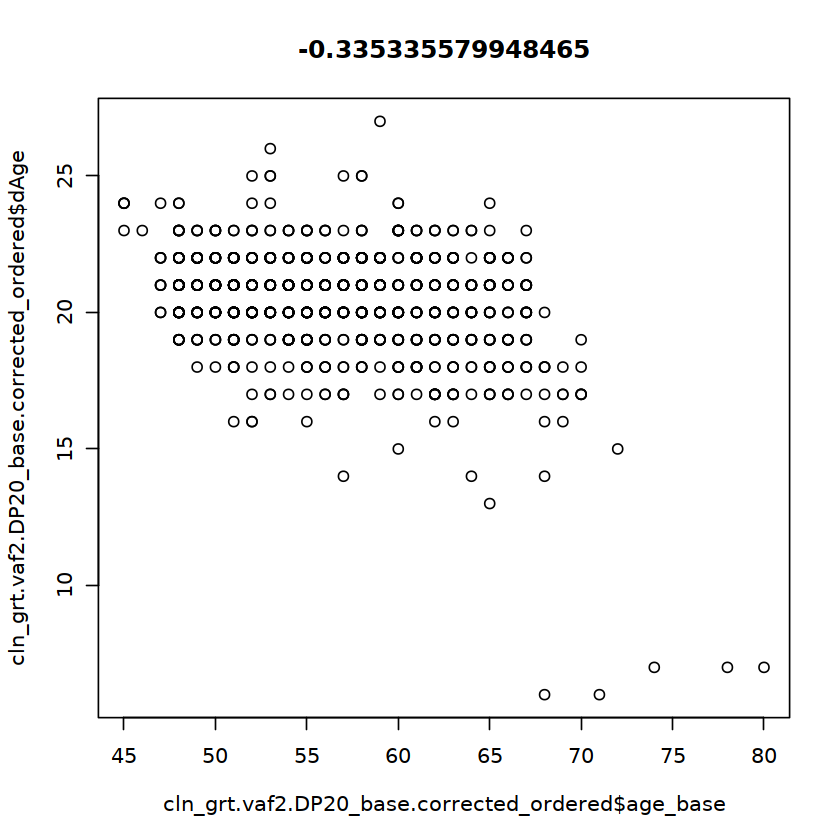

In [19]:
######## Main Analysis: overall genes with >=10 clones
## Age association: w/o follow-up time adjustment
plot(cln_grt.vaf2.DP20_base.corrected_ordered$age_base, cln_grt.vaf2.DP20_base.corrected_ordered$dAge, main=cor(cln_grt.vaf2.DP20_base.corrected_ordered$age_base, cln_grt.vaf2.DP20_base.corrected_ordered$dAge))
cor(cln_grt.vaf2.DP20_base.corrected_ordered$age_base, cln_grt.vaf2.DP20_base.corrected_ordered$dAge)

model1age <- cln_grt.vaf2.DP20_base.corrected_ordered %>%     
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~   age_base + 
           Gene_Group_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
            chol_med_base +         
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) 

summary(model1age)

mod1age_dat <- as.data.frame(summary(model1age)$coefficients, stringsAsFactors = F)
names(mod1age_dat) <- c("Estimate", "SE","t", "P")
mod1age_dat$Exposures <- row.names(mod1age_dat)
str(mod1age_dat)

mod1age_dat$beta <- round(mod1age_dat$Estimate, 3)

mod1age_dat$beta_CI95 <- paste0(mod1age_dat$beta, " [",formatC(round(( mod1age_dat$Estimate - 1.96 * mod1age_dat$SE),3), digits = 3, format = "f"),
                                     ", ",
                                     formatC(round(( mod1age_dat$Estimate + 1.96 * mod1age_dat$SE),3), digits = 3, format = "f"), 
                                     "]")
mod1age_dat$P_val <- formatC(x = mod1age_dat$P, digits = 1,format = "E")

head(mod1age_dat)

In [20]:
## 
cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2 <- cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2
cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2[cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2==1e-4] <- 0.001

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2)
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2)

cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$logdVAF_by_dT_ver2 <- log(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v5/cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$VAF.v2_v2)/cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$dAge
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$logdVAF_by_dT_ver2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00010 0.00010 0.00010 0.03345 0.03375 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00100 0.00100 0.00100 0.03395 0.03375 0.47100 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.06682 0.18316 0.15750 0.23209 0.94572 

In [21]:
model2 <- cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%     
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_Group_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +       
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) 

summary(model2)

mod2_dat <- as.data.frame(summary(model2)$coefficients, stringsAsFactors = F)
names(mod2_dat) <- c("Estimate", "SE","t", "P")
mod2_dat$Exposures <- row.names(mod2_dat)
str(mod2_dat)

mod2_dat$beta <- round(mod2_dat$Estimate, 3)

mod2_dat$beta_CI95 <- paste0(mod2_dat$beta, " [",formatC(round(( mod2_dat$Estimate - 1.96 * mod2_dat$SE),3), digits = 3, format = "f"),
                                     ", ",
                                     formatC(round(( mod2_dat$Estimate + 1.96 * mod2_dat$SE),3), digits = 3, format = "f"), 
                                     "]")
mod2_dat$P_val <- formatC(x = mod2_dat$P, digits = 1,format = "E")

head(mod2_dat)


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_Group_R882 + 
    Variant_type + Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + chd_is_base + age_base + dAge + chol_med_base + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51860 -0.38164  0.02464  0.35607  1.54880 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.333738   0.474329   0.704 0.481955    
Gene_Group_R882DNMT3A_R882 -0.050448   0.133543  -0.378 0.705735    
Gene_Group_R882TET2         0.324155   0.065549   4.945 9.88e-07 ***
Gene_Group_R882ASXL1        0.216261   0.091381   2.367 0.018269 *  
Gene_Group_R882DDR          0.290008   0.105315   2.754 0.006071 ** 
Gene_Group_R882SF           0.402440   0.089916   4.476 9.11e-06 ***
Gene_Group_R

'data.frame':	30 obs. of  5 variables:
 $ Estimate : num  0.3337 -0.0504 0.3242 0.2163 0.29 ...
 $ SE       : num  0.4743 0.1335 0.0655 0.0914 0.1053 ...
 $ t        : num  0.704 -0.378 4.945 2.367 2.754 ...
 $ P        : num  4.82e-01 7.06e-01 9.88e-07 1.83e-02 6.07e-03 ...
 $ Exposures: chr  "(Intercept)" "Gene_Group_R882DNMT3A_R882" "Gene_Group_R882TET2" "Gene_Group_R882ASXL1" ...


,Estimate,SE,t,P,Exposures,beta,beta_CI95,P_val
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
(Intercept),0.33373787,0.47432925,0.7035996,4.819547e-01,(Intercept),0.334,"0.334 [-0.596, 1.263]",4.8E-01
Gene_Group_R882DNMT3A_R882,-0.05044845,0.13354264,-0.3777704,7.057346e-01,Gene_Group_R882DNMT3A_R882,-0.050,"-0.05 [-0.312, 0.211]",7.1E-01
Gene_Group_R882TET2,0.32415503,0.06554944,4.9451988,9.883545e-07,Gene_Group_R882TET2,0.324,"0.324 [0.196, 0.453]",9.9E-07
Gene_Group_R882ASXL1,0.21626117,0.09138074,2.3665945,1.826866e-02,Gene_Group_R882ASXL1,0.216,"0.216 [0.037, 0.395]",1.8E-02
Gene_Group_R882DDR,0.29000761,0.10531520,2.7537107,6.070606e-03,Gene_Group_R882DDR,0.290,"0.29 [0.084, 0.496]",6.1E-03
Gene_Group_R882SF,0.40243999,0.08991622,4.4757216,9.111811e-06,Gene_Group_R882SF,0.402,"0.402 [0.226, 0.579]",9.1E-06


In [22]:
## W/O dAge adjustment
model2age <- cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%     
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_Group_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base +    chol_med_base +       
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) 

summary(model2age)

mod2age_dat <- as.data.frame(summary(model2age)$coefficients, stringsAsFactors = F)

names(mod2age_dat) <- c("Estimate", "SE","t", "P")
mod2age_dat$Exposures <- row.names(mod2age_dat)
str(mod2age_dat)

mod2age_dat$beta <- round(mod2age_dat$Estimate, 3)

mod2age_dat$beta_CI95 <- paste0(mod2age_dat$beta, " [",formatC(round(( mod2age_dat$Estimate - 1.96 * mod2age_dat$SE),3), 
                                                               digits = 3, format = "f"),
                                     ", ",
                                     formatC(round(( mod2age_dat$Estimate + 1.96 * mod2age_dat$SE),3), 
                                             digits = 3, format = "f"), 
                                     "]")
mod2age_dat$P_val <- formatC(x = mod2age_dat$P, digits = 1,format = "E")

head(mod2age_dat)


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_Group_R882 + 
    Variant_type + Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + chd_is_base + age_base + chol_med_base + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93030 -0.38783 -0.00378  0.36525  1.81654 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.895169   0.368948  -5.137 3.78e-07 ***
Gene_Group_R882DNMT3A_R882 -0.020802   0.138815  -0.150 0.880927    
Gene_Group_R882TET2         0.336268   0.068148   4.934 1.04e-06 ***
Gene_Group_R882ASXL1        0.205009   0.095021   2.158 0.031361 *  
Gene_Group_R882DDR          0.291802   0.109527   2.664 0.007924 ** 
Gene_Group_R882SF           0.414696   0.093495   4.435 1.09e-05 ***
Gene_Group_R882Othe

'data.frame':	29 obs. of  5 variables:
 $ Estimate : num  -1.8952 -0.0208 0.3363 0.205 0.2918 ...
 $ SE       : num  0.3689 0.1388 0.0681 0.095 0.1095 ...
 $ t        : num  -5.14 -0.15 4.93 2.16 2.66 ...
 $ P        : num  3.78e-07 8.81e-01 1.04e-06 3.14e-02 7.92e-03 ...
 $ Exposures: chr  "(Intercept)" "Gene_Group_R882DNMT3A_R882" "Gene_Group_R882TET2" "Gene_Group_R882ASXL1" ...


,Estimate,SE,t,P,Exposures,beta,beta_CI95,P_val
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
(Intercept),-1.89516931,0.36894762,-5.1366894,3.782304e-07,(Intercept),-1.895,"-1.895 [-2.618, -1.172]",3.8E-07
Gene_Group_R882DNMT3A_R882,-0.02080246,0.13881510,-0.1498573,8.809274e-01,Gene_Group_R882DNMT3A_R882,-0.021,"-0.021 [-0.293, 0.251]",8.8E-01
Gene_Group_R882TET2,0.33626773,0.06814773,4.9343936,1.041967e-06,Gene_Group_R882TET2,0.336,"0.336 [0.203, 0.470]",1.0E-06
Gene_Group_R882ASXL1,0.20500901,0.09502095,2.1575137,3.136060e-02,Gene_Group_R882ASXL1,0.205,"0.205 [0.019, 0.391]",3.1E-02
Gene_Group_R882DDR,0.29180170,0.10952675,2.6642048,7.923803e-03,Gene_Group_R882DDR,0.292,"0.292 [0.077, 0.506]",7.9E-03
Gene_Group_R882SF,0.41469574,0.09349491,4.4354902,1.092239e-05,Gene_Group_R882SF,0.415,"0.415 [0.231, 0.598]",1.1E-05


In [23]:
## Date: May 13, 2024
write.csv(mod1_dat, "mod1_dat.cln_grt.vaf2.DP20_baseImpvaf001.corrected_ordered.2024May13.csv")
write.csv(mod2_dat, "mod2_dat.cln_grt.vaf2.DP20_baseImpvaf001_allAD5FRRR2.corrected_ordered.2024May13.csv")
write.csv(mod1age_dat, "mod1age_dat.cln_grt.vaf2.DP20_baseImpvaf001.corrected_ordered.2024May13.csv")
write.csv(mod2age_dat, "mod2age_dat.cln_grt.vaf2.DP20_baseImpvaf001_allAD5FRRR2.corrected_ordered.2024May13.csv")

In [129]:
# write.csv(mod1_dat, "mod1_dat.cln_grt.vaf2.DP20_base.corrected_ordered.csv")
# write.csv(mod2_dat, "mod2_dat.cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered.csv")

write.csv(mod1_dat, "mod1_dat.cln_grt.vaf2.DP20_baseImpvaf001.corrected_ordered.csv")
write.csv(mod2_dat, "mod2_dat.cln_grt.vaf2.DP20_baseImpvaf001_allAD5FRRR2.corrected_ordered.csv")

In [ ]:
####### Gene-specific

In [44]:
sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene),decreasing = T)
sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene),decreasing = T)

sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene_Group_R882),decreasing = T)

sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene_R882),decreasing = T)
sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene_R882),decreasing = T)


DNMT3A   TET2  ASXL1  SF3B1  PPM1D   TP53 ZBTB33 ZNF318  SRSF2  SRCAP  BRCC3 
   422    189     64     38     36     23     19     16     12     10      9 
  GNB1  PDS5B  STAG2  YLPM1    CBL  U2AF1   PHIP   IDH2   JAK2  ZRSR2  ASXL2 
     9      9      9      9      8      8      7      6      6      6      5 
   NF1  PRPF8  KDM6A   KRAS   PTEN CREBBP   CUX1   NRAS   NXF1 PTPN11   BCOR 
     5      5      4      4      3      2      2      2      2      2      1 
BCORL1   CBLB  EP300   ETV6   IDH1    KIT    MPL   PHF6  RUNX1 SETBP1  SETD2 
     1      1      1      1      1      1      1      1      1      1      1 
 SUZ12 
     1 


DNMT3A   TET2  ASXL1  SF3B1  PPM1D  SRSF2   TP53 ZBTB33 ZNF318  BRCC3  U2AF1 
   292    127     53     31     23     11     11     11     11      8      8 
  GNB1   IDH2  SRCAP    CBL  YLPM1  ZRSR2  PDS5B  PRPF8   JAK2   PHIP  ASXL2 
     6      6      6      5      5      5      4      4      3      3      2 
CREBBP   NRAS   PTEN PTPN11  STAG2   BCOR BCORL1   CUX1   IDH1  KDM6A    KIT 
     2      2      2      2      2      1      1      1      1      1      1 
  KRAS    MPL    NF1   NXF1 SETBP1  SETD2  SUZ12 
     1      1      1      1      1      1      1 


DNMT3A_nonR882           TET2          Other             SF          ASXL1 
           271            127             97             55             53 
           DDR    DNMT3A_R882 
            34             21 


DNMT3A_nonR882           TET2          ASXL1          SF3B1          PPM1D 
           271            127             53             31             23 
   DNMT3A_R882           TP53         ZBTB33         ZNF318          SRSF2 
            21             11             11             11             11 
         BRCC3          U2AF1          SRCAP           GNB1           IDH2 
             8              8              6              6              6 
         YLPM1            CBL          ZRSR2          PDS5B          PRPF8 
             5              5              5              4              4 
          JAK2           PHIP          STAG2          ASXL2           NRAS 
             3              3              2              2              2 
        CREBBP           PTEN         PTPN11            NF1          KDM6A 
             2              2              2              1              1 
          CUX1           KRAS           NXF1           BCOR          SUZ12 
           


DNMT3A_nonR882           TET2          ASXL1          SF3B1    DNMT3A_R882 
           386            189             64             38             36 
         PPM1D           TP53         ZBTB33         ZNF318          SRSF2 
            36             23             19             16             12 
         SRCAP          YLPM1          BRCC3          STAG2          PDS5B 
            10              9              9              9              9 
          GNB1          U2AF1            CBL           PHIP           JAK2 
             9              8              8              7              6 
         ZRSR2           IDH2            NF1          ASXL2          PRPF8 
             6              6              5              5              5 
         KDM6A           KRAS           PTEN           CUX1           NRAS 
             4              4              3              2              2 
        CREBBP           NXF1         PTPN11           PHF6           BCOR 
           

In [134]:
head(names(sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene),decreasing = T)),10)
head(names(sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene),decreasing = T)),9)

gene_list1n10 <- head(names(sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene),decreasing = T)),10)
gene_list2n9 <- head(names(sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene),decreasing = T)),9)

[1] "DNMT3A" "TET2"   "ASXL1"  "SF3B1"  "PPM1D"  "TP53"   "ZBTB33" "ZNF318"
 [9] "SRSF2"  "SRCAP"

[1] "DNMT3A" "TET2"   "ASXL1"  "SF3B1"  "PPM1D"  "SRSF2"  "TP53"   "ZBTB33"
[9] "ZNF318"

In [132]:
## n CHIP>=10
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene %in% head(names(sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene),
                                         decreasing = T)),10)) %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_R882 + Variant_type + 
    Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.56878 -0.38390 -0.00692  0.36348  1.69310 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.561641   0.434753   1.292  0.19680    
Gene_R882DNMT3A_R882       0.144659   0.101611   1.424  0.15496    
Gene_R882TET2              0.227773   0.055046   4.138 3.89e-05 ***
Gene_R882ASXL1             0.193589   0.083759   2.311  0.02108 *  
Gene_R882SF3B1             0.499960   0.101464   4.927 1.02e-06 ***
Gene_R882PPM1D             0.234177   0.105396   2.222  0.02658 *  
Gene_R882TP53              0.2

In [133]:
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene %in% head(names(sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene),
                                         decreasing = T)),9)) %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_R882 + Variant_type + 
    Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.55135 -0.39002  0.01371  0.33844  1.72135 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.341253   0.529520   0.644 0.519568    
Gene_R882DNMT3A_R882      -0.032064   0.135001  -0.238 0.812359    
Gene_R882TET2              0.329135   0.066834   4.925 1.14e-06 ***
Gene_R882ASXL1             0.203000   0.093809   2.164 0.030928 *  
Gene_R882SF3B1             0.435251   0.115864   3.757 0.000192 ***
Gene_R882PPM1D             0.371131   0.131083   2.831 0.004819 ** 
Gene_R882TP53              0.2

In [171]:
## n CHIP>=10: Dyslipidemia
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene %in% head(names(sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene),
                                         decreasing = T)),10)) %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Variant_type + Sex  + race_BW + ever_smoke + 
           Dyslipidemia + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene =="TET2") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Variant_type + Sex  + race_BW + ever_smoke + 
           Dyslipidemia + INT_yang2012(bmi_base) + 
                     
           age_base + dAge +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_R882 + Variant_type + 
    Sex + race_BW + ever_smoke + Dyslipidemia + INT_yang2012(bmi_base) + 
    dm_126_base + htn_5_base + chd_is_base + age_base + dAge + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.57914 -0.38916 -0.01459  0.36885  1.82173 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.587621   0.432234   1.359  0.17439    
Gene_R882DNMT3A_R882    0.143941   0.101501   1.418  0.15656    
Gene_R882TET2           0.227769   0.055380   4.113 4.33e-05 ***
Gene_R882ASXL1          0.187883   0.084230   2.231  0.02600 *  
Gene_R882SF3B1          0.497566   0.101391   4.907 1.13e-06 ***
Gene_R882PPM1D          0.228131   0.105446   2.163  0.03081 *  
Gene_R882TP53           0.193544   0.121348   1.595  0.11114    
Gene_R882ZBTB33         0.260467   0.132

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [172]:
table(cln_grt.vaf2.DP20_base.corrected_ordered[
    cln_grt.vaf2.DP20_base.corrected_ordered$Gene=="TET2", c(110:ncol(cln_grt.vaf2.DP20_base.corrected_ordered))])


110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
190 191 
  1   1 

In [174]:
names(cln_grt.vaf2.DP20_base.corrected_ordered)

[1] "CHROM_POS_GWAS_VISIT_base" "ARIC_ID"                  
  [3] "varID_GWASID"              "GWAS_ID.x"                
  [5] "CHR"                       "POS"                      
  [7] "REF"                       "ALT"                      
  [9] "Gene"                      "AD.v5"                    
 [11] "VAF.v5"                    "DP.v5"                    
 [13] "AD.Alt.v5"                 "FR.Alt.v5"                
 [15] "RR.Alt.v5"                 "Accession"                
 [17] "transcriptOI"              "NonsynOI"                 
 [19] "Func.refGene"              "ExonicFunc.refGene"       
 [21] "AAChange.refGene"          "AD.v2"                    
 [23] "VAF.v2"                    "DP.v2"                    
 [25] "AD.Alt.v2"                 "FR.Alt.v2"                
 [27] "RR.Alt.v2"                 "Batch"                    
 [29] "dAge"                      "dVAF"                     
 [31] "pctVAF"                    "growth_rate"              
 [33] "log_growth_rate"           "Gene_Group"               
 [35] "Gene_Group_2"              "Clone_status"             
 [37] "Trajectory"                "GWAS_ID.y"                
 [39] "GWASID_Visit"              "cram_id"                  
 [41] "Visit.x"                   "Gender"                   
 [43] "Age"                       "CH_baseline"              
 [45] "CH_v05"                    "incident_CH"              
 [47] "incident_CHvaf05"          "incident_CHvaf10"         
 [49] "incident_DNMT3A"           "incident_TET2"            
 [51] "incident_ASXL1"            "incident_DTA"             
 [53] "incident_SF"               "incident_DDR"             
 [55] "death.x"                   "death_date.x"             
 [57] "hg38_CRAM_ID"              "aricid"                   
 [59] "Visit.y"                   "sex"                      
 [61] "race"                      "center"                   
 [63] "dob"                       "date_base"                
 [65] "age_base"                  "fast_8_base"              
 [67] "bmi_base"                  "dm_126_base"              
 [69] "gluc_base"                 "htn_5_base"               
 [71] "chol_med_base"             "statin_base"              
 [73] "cig_base"                  "chd_date"                 
 [75] "is_date"                   "hs_date"                  
 [77] "hf_date"                   "death.y"                  
 [79] "death_date.y"              "lfu_date"                 
 [81] "chd_base"                  "is_base"                  
 [83] "hs_base"                   "hf_base"                  
 [85] "ever_smoke"                "v2_vs_other"              
 [87] "Sex"                       "race_BW"                  
 [89] "BMI_cat"                   "nonHDL_std"               
 [91] "hdl_base_std"              "ldl_base_std"             
 [93] "chol_base_std"             "tg_base_std"              
 [95] "gluc_base_std"             "bmi_base_std"             
 [97] "CHvaf10_baseline"          "CH_baseline_v05"          
 [99] "CHvaf10_baseline_v05"      "CH_DTA"                   
[101] "CH_SF"                     "CH_DDR"                   
[103] "CH_DNMT3A"                 "CH_TET2"                  
[105] "CH_ASXL1"                  "nonHDL_base_std"          
[107] "age_base_sqr"              "Center"                   
[109] "sbp_base"                  "dbp_base"                 
[111] "hem_can_base"              "hem_can_inc_base"         
[113] "hem_can_int_base"          "hem_can_inc_v5"           
[115] "hem_can_int_v5"            "chol_base"                
[117] "hdl_base"                  "ldl_base"                 
[119] "tg_base"                   "chd_is_base"              
[121] "chol_base_INT"             "ldl_base_INT"             
[123] "hdl_base_INT"              "tg_base_INT"              
[125] "nonHDL_base"               "nonHDL_base_INT"          
[127] "bmi_base_INT"              "tg_to_hdl_base"           
[129] "tg_to_hdl_base_INT"        

In [136]:
### individual genes
head((sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene),decreasing = T)),10)
head((sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene),decreasing = T)),9)

head(names(sort(table(cln_grt.vaf2.DP20_base.corrected_ordered$Gene),decreasing = T)),10)
head(names(sort(table(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered$Gene),decreasing = T)),9)



DNMT3A   TET2  ASXL1  SF3B1  PPM1D   TP53 ZBTB33 ZNF318  SRSF2  SRCAP 
   422    189     64     38     36     23     19     16     12     10 


DNMT3A   TET2  ASXL1  SF3B1  PPM1D  SRSF2   TP53 ZBTB33 ZNF318 
   292    127     53     31     23     11     11     11     11 

[1] "DNMT3A" "TET2"   "ASXL1"  "SF3B1"  "PPM1D"  "TP53"   "ZBTB33" "ZNF318"
 [9] "SRSF2"  "SRCAP"

[1] "DNMT3A" "TET2"   "ASXL1"  "SF3B1"  "PPM1D"  "SRSF2"  "TP53"   "ZBTB33"
[9] "ZNF318"

In [139]:
## DNMT3A: 422 
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene == "DNMT3A") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

## n = 292
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene == "DNMT3A") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene == "DNMT3A") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

## 
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene == "DNMT3A") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Variant_type + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75140 -0.39065  0.03908  0.36490  1.62053 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.065482   0.661722   0.099   0.9212    
SexM                      -0.026410   0.065280  -0.405   0.6860    
race_BWW                   0.244380   0.220910   1.106   0.2693    
ever_smoke                -0.041214   0.057945  -0.711   0.4774    
INT_yang2012(hdl_base)     0.047080   0.035780   1.316   0.1890    
INT_yang2012(nonHDL_base) -0.003133   0.031084  -0.101   0.9198    
INT_yang2012(bmi_base)     0.073918   0.034139   2.165   


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59845 -0.37831  0.01618  0.35398  1.41045 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.952052   0.778745   1.223  0.22262    
SexM                      -0.079907   0.076665  -1.042  0.29826    
race_BWW                   0.188724   0.241236   0.782  0.43475    
ever_smoke                -0.094617   0.068397  -1.383  0.16776    
INT_yang2012(hdl_base)     0.094188   0.042098   2.237  0.02612 *  
INT_yang2012(nonHDL_base)  0.011617   0.037314   0.311  0.75580    
INT_yang2012(bmi_base)     0.105412   0.040115   2.628  0


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_R882 + Variant_type + 
    Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.75798 -0.39843  0.03114  0.34832  1.68097 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.118001   0.664314  -0.178   0.8591    
Gene_R882DNMT3A_R882       0.101996   0.105418   0.968   0.3339    
Variant_typeINDEL          0.015645   0.086073   0.182   0.8559    
Variant_typeStopgain      -0.086802   0.085307  -1.018   0.3096    
Variant_typeSplicing       0.191119   0.095960   1.992   0.0471 *  
SexM                      -0.039708   0.065853  -0.603   0.5469    
race_BWW                   0.2


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_R882 + Variant_type + 
    Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60448 -0.37428  0.01011  0.38729  1.47624 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.8632499  0.7973601   1.083   0.2800    
Gene_R882DNMT3A_R882      -0.1133070  0.1413392  -0.802   0.4235    
Variant_typeINDEL         -0.0497127  0.1014634  -0.490   0.6246    
Variant_typeStopgain      -0.1513612  0.1004316  -1.507   0.1330    
Variant_typeSplicing       0.1373158  0.1089327   1.261   0.2086    
SexM                      -0.0916088  0.0773206  -1.185   0.2372    
race_BWW               

In [148]:
## TET2: 189| 127
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene == "TET2") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                     
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

## n = 127
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene == "TET2") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                     
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + age_base + 
    dAge + chol_med_base + log(DP.v2) + v2_vs_other + center + 
    Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25464 -0.34908 -0.01496  0.34346  1.47234 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.306233   0.874168   1.494  0.13700    
SexM                       0.136033   0.095893   1.419  0.15788    
race_BWW                   0.210457   0.309299   0.680  0.49717    
ever_smoke                -0.151646   0.088447  -1.715  0.08828 .  
INT_yang2012(hdl_base)     0.005033   0.050702   0.099  0.92105    
INT_yang2012(nonHDL_base) -0.057829   0.046344  -1.248  0.21384    
INT_yang2012(bmi_base)    -0.051062   0.044247  -1.154  0.25014    
dm_


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + age_base + 
    dAge + chol_med_base + log(DP.v2) + v2_vs_other + center + 
    Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26242 -0.32916 -0.03531  0.32933  1.25689 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.743e-01  1.066e+00  -0.351  0.72626    
SexM                      -1.496e-03  1.159e-01  -0.013  0.98972    
race_BWW                   1.789e-01  4.198e-01   0.426  0.67089    
ever_smoke                -1.179e-01  1.117e-01  -1.055  0.29364    
INT_yang2012(hdl_base)    -1.813e-05  6.262e-02   0.000  0.99977    
INT_yang2012(nonHDL_base) -8.943e-02  5.633e-02  -1.588  0.11537    
INT_yang2012(bmi_base)    -3.187e-02  5.356e-02  -0.595  0.55305

In [147]:
### ASXL1: 64 | 53
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene == "ASXL1") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

## n = 53
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene == "ASXL1") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
            Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13314 -0.37424 -0.04019  0.36675  1.54858 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.49884    1.89316  -0.792 0.432775    
SexM                       0.02599    0.21499   0.121 0.904329    
race_BWW                  -0.28007    0.32724  -0.856 0.396724    
ever_smoke                -0.18360    0.19256  -0.953 0.345556    
INT_yang2012(hdl_base)    -0.03909    0.10873  -0.360 0.720928    
INT_yang2012(nonHDL_base)  0.04364    0.10933   0.399 0.691696    
INT_yang2012(bmi_base)     0.12318    0.11207   1.099 0.277675    
dm_126


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13267 -0.33859  0.00206  0.36301  1.34464 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -3.65102    2.29216  -1.593 0.120734    
SexM                       0.02709    0.23032   0.118 0.907094    
race_BWW                  -0.14644    0.35750  -0.410 0.684720    
ever_smoke                -0.17064    0.21754  -0.784 0.438398    
INT_yang2012(hdl_base)    -0.08480    0.11767  -0.721 0.476180    
INT_yang2012(nonHDL_base)  0.02402    0.11890   0.202 0.841122    
INT_yang2012(bmi_base)     0.13269    0.12983   1.022 0.314209    
dm_126

In [146]:
## SF3B1: 38 | 31
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene == "SF3B1") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )

## n = 31
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene == "SF3B1") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8865 -0.3570 -0.0192  0.2754  1.0698 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)               -6.3580732  4.1325932  -1.539  0.14132   
SexM                       0.0438051  0.4415827   0.099  0.92208   
race_BWW                   0.5876896  1.0726140   0.548  0.59049   
ever_smoke                 0.1742966  0.4537051   0.384  0.70536   
INT_yang2012(hdl_base)     0.0208183  0.1806603   0.115  0.90953   
INT_yang2012(nonHDL_base) -0.2587282  0.1778725  -1.455  0.16300   
INT_yang2012(bmi_base)     0.0913580  0.1454577   0.628  0.53784   
dm_126_base  


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8743 -0.3505  0.0000  0.2730  0.9299 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)  
(Intercept)               -5.58889    6.21499  -0.899   0.3878  
SexM                       0.05537    0.50186   0.110   0.9141  
race_BWW                   0.95001    1.23929   0.767   0.4595  
ever_smoke                 0.50704    0.48109   1.054   0.3145  
INT_yang2012(hdl_base)     0.09769    0.20894   0.468   0.6492  
INT_yang2012(nonHDL_base) -0.46499    0.24562  -1.893   0.0849 .
INT_yang2012(bmi_base)     0.27691    0.18927   1.463   0.1714  
dm_126_base                1.06983   

In [160]:
## SF: 38 | 31
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene_Group == "SF") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )

## n = 31
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene_Group == "SF") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Gene_R882 + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_R882 + Sex + 
    race_BW + ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25337 -0.48077 -0.04299  0.41010  1.18501 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.192667   2.734571  -0.070   0.9442    
Gene_R882SRSF2            -0.167861   0.339048  -0.495   0.6232    
Gene_R882U2AF1             0.457896   0.321420   1.425   0.1618    
Gene_R882ZRSR2             0.724462   0.389300   1.861   0.0699 .  
SexM                      -0.225051   0.296516  -0.759   0.4522    
race_BWW                  -0.688944   0.976073  -0.706   0.4843    
ever_smoke                -0.164623   0.281837  -0.584   0.


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Gene_R882 + Sex + 
    race_BW + ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + chd_is_base + 
    age_base + dAge + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98376 -0.45882 -0.06141  0.42424  1.03744 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -0.029463   3.149566  -0.009   0.9926    
Gene_R882SRSF2            -0.146854   0.373002  -0.394   0.6964    
Gene_R882U2AF1             0.447582   0.329154   1.360   0.1834    
Gene_R882ZRSR2             0.964291   0.434014   2.222   0.0335 *  
SexM                      -0.176530   0.297528  -0.593   0.5571    
race_BWW                  -0.612914   1.007700  -0.608   0.5473    
ever_smoke                -0.153527   0.298917  -0.514   0.

In [158]:
## PPM1D: 36|23 
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene == "PPM1D") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                     
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )

## n = 23
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene == "PPM1D") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                     
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + age_base + 
    dAge + chol_med_base + log(DP.v2) + v2_vs_other + center + 
    Imputed_VAF_v2 + is_notMUTECT, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.03645 -0.22837 -0.06467  0.11815  1.10334 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.182158   3.956396   1.057 0.306183    
SexM                      -0.378392   0.352613  -1.073 0.299140    
race_BWW                  -0.891690   1.115714  -0.799 0.435873    
ever_smoke                -0.347227   0.271771  -1.278 0.219603    
INT_yang2012(hdl_base)    -0.067361   0.168850  -0.399 0.695212    
INT_yang2012(nonHDL_base)  0.198900   0.141756   1.403 0.179690    
INT_yang2012(bmi_base)    -0.105538   0.186101  -0.567 0.578516    
dm_126_base      


Call:
lm(formula = INT_yang2012(logdVAF_by_dT_ver2) ~ Sex + race_BW + 
    ever_smoke + INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + 
    INT_yang2012(bmi_base) + dm_126_base + htn_5_base + age_base + 
    dAge + chol_med_base + log(DP.v2) + v2_vs_other + center + 
    Imputed_VAF_v2 + is_notMUTECT, data = .)

Residuals:
         1          2          3          4          5          6          7 
 3.807e-03 -2.078e-01  5.996e-01  6.499e-02 -5.378e-01 -3.807e-03  8.098e-02 
         8          9         10         11         12         14         15 
 7.496e-02 -8.098e-02 -8.098e-02  8.699e-02 -7.205e-02  6.604e-02  6.014e-03 
        16         17         18         19         20         21         22 
 2.888e-01 -2.123e-01  5.247e-01 -2.408e-01 -4.071e-02  3.218e-01 -3.512e-16 
        23 
-6.415e-01 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)  
(Intercept)                8.71948   10.49304   0.831   0.4669  
SexM                       2.00

In [162]:
## PPM1D: 36|23 
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        filter(Gene == "TP53") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) +
                     
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )

## n = 23
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        filter(Gene == "TP53") %>%  
        lm(INT_yang2012(logdVAF_by_dT_ver2) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                     
           age_base + dAge +    chol_med_base +        
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT, data=. ) )

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [ ]:
######################

In [42]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.84122 -0.66607 -0.00294  0.66489  2.79278 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.387823   0.620238   2.238 0.025481 *  
Gene_Group_R882DNMT3A_R882  0.194239   0.167275   1.161 0.245853    
Gene_Group_R882TET2         0.424653   0.087671   4.844 1.49e-06 ***
Gene_Group_R882ASXL1        0.489032   0.130728   3.741 0.000194 ***
Gene_Group_R882DDR          0.204510   0.135304   1.511 0.130999    
Gene_Group_R882SF           0.806476   0.135743   5.941 3.97e-09 ***
Gene_Group_R882Other        0.217412   0.090988   2.389 0.017068 *  
age_base                    0.013159   0.005814   2.263 0.023845 *  
dAge                       -0.077161   0.018847  -4.094 4.60e-05 ***
log(DP.


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.57884 -0.38140 -0.01123  0.35291  1.57893 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.843460   0.344679   2.447  0.01458 *  
Gene_Group_R882DNMT3A_R882  0.075647   0.092958   0.814  0.41598    
Gene_Group_R882TET2         0.201794   0.048720   4.142 3.75e-05 ***
Gene_Group_R882ASXL1        0.211127   0.072648   2.906  0.00374 ** 
Gene_Group_R882DDR          0.181805   0.075191   2.418  0.01580 *  
Gene_Group_R882SF           0.390119   0.075435   5.172 2.83e-07 ***
Gene_Group_R882Other        0.142791   0.050564   2.824  0.00484 ** 
age_base                    0.005770   0.003231   1.786  0.07445 .  
dAge                       -0.130443   0.010473 -12.455  < 2e-16 ***
log(


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.83991 -0.66226 -0.00517  0.66596  2.73381 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.1961760  0.6360301   1.881 0.060343 .  
Gene_Group_R882DNMT3A_R882  0.1811978  0.1672735   1.083 0.278996    
Gene_Group_R882TET2         0.4480755  0.0911937   4.913 1.07e-06 ***
Gene_Group_R882ASXL1        0.5069510  0.1355664   3.740 0.000196 ***
Gene_Group_R882DDR          0.1657353  0.1418583   1.168 0.242995    
Gene_Group_R882SF           0.7881633  0.1372882   5.741 1.29e-08 ***
Gene_Group_R882Other        0.2528787  0.0945013   2.676 0.007590 ** 
age_base                    0.0143144  0.0059838   2.392 0.016956 *  
dAge                       -0.0729273  0.0192294  -3.792 0.000159 *


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.63210 -0.36486  0.00362  0.35581  1.57226 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.563447   0.352692   1.598  0.11050    
Gene_Group_R882DNMT3A_R882  0.062390   0.092757   0.673  0.50137    
Gene_Group_R882TET2         0.210084   0.050569   4.154 3.58e-05 ***
Gene_Group_R882ASXL1        0.218078   0.075174   2.901  0.00381 ** 
Gene_Group_R882DDR          0.171801   0.078663   2.184  0.02922 *  
Gene_Group_R882SF           0.368026   0.076129   4.834 1.58e-06 ***
Gene_Group_R882Other        0.147361   0.052403   2.812  0.00503 ** 
age_base                    0.006755   0.003318   2.036  0.04206 *  
dAge                       -0.122717   0.010663 -11.509  < 2e-16 ***
log(


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49908 -0.65253 -0.04169  0.67164  2.58368 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.539532   0.736315   2.091 0.036934 *  
Gene_Group_R882DNMT3A_R882  0.124535   0.213795   0.582 0.560435    
Gene_Group_R882TET2         0.596658   0.103190   5.782 1.15e-08 ***
Gene_Group_R882ASXL1        0.426421   0.142439   2.994 0.002862 ** 
Gene_Group_R882DDR          0.460329   0.173515   2.653 0.008177 ** 
Gene_Group_R882SF           0.845275   0.148369   5.697 1.86e-08 ***
Gene_Group_R882Other        0.486737   0.113217   4.299 1.98e-05 ***
age_base                    0.015722   0.006858   2.293 0.022194 *  
dAge                       -0.083571   0.022089  -3.783 0.000169 ***
log(DP.


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6564 -0.3748 -0.0001  0.3509  1.5000 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.655535   0.410650   1.596  0.11091    
Gene_Group_R882DNMT3A_R882 -0.058111   0.119236  -0.487  0.62617    
Gene_Group_R882TET2         0.265561   0.057550   4.614 4.76e-06 ***
Gene_Group_R882ASXL1        0.153716   0.079439   1.935  0.05343 .  
Gene_Group_R882DDR          0.239920   0.096771   2.479  0.01342 *  
Gene_Group_R882SF           0.327950   0.082747   3.963 8.22e-05 ***
Gene_Group_R882Other        0.199718   0.063142   3.163  0.00164 ** 
age_base                    0.005529   0.003825   1.446  0.14873    
dAge                       -0.112201   0.012319  -9.108  < 2e-16 ***
log(DP.v2)    

In [48]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm(INT_yang2012(VAF.v5 - VAF.v2) ~ Gene_Group_R882 + age_base +   dAge+         
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + age_base +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + age_base +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + age_base +            
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.86372 -0.67789  0.02444  0.63967  2.87908 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.343139   0.457569  -0.750 0.453490    
Gene_Group_R882DNMT3A_R882  0.229508   0.168436   1.363 0.173336    
Gene_Group_R882TET2         0.438107   0.088334   4.960 8.37e-07 ***
Gene_Group_R882ASXL1        0.495815   0.131800   3.762 0.000179 ***
Gene_Group_R882DDR          0.209947   0.136418   1.539 0.124137    
Gene_Group_R882SF           0.813539   0.136856   5.945 3.89e-09 ***
Gene_Group_R882Other        0.226921   0.091712   2.474 0.013524 *  
age_base                    0.018778   0.005697   3.296 0.001016 ** 
log(DP.v2)                 -0.225291   0.061841  -3.643 0.000284 ***
v2_vs_otherV02


Call:
lm(formula = INT_yang2012(VAF.v5 - VAF.v2) ~ Gene_Group_R882 + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.87645 -0.67772  0.00491  0.67693  2.92531 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.013697   0.627813   0.022 0.982598    
Gene_Group_R882DNMT3A_R882  0.199265   0.169317   1.177 0.239542    
Gene_Group_R882TET2         0.424679   0.088741   4.786 1.98e-06 ***
Gene_Group_R882ASXL1        0.491805   0.132325   3.717 0.000214 ***
Gene_Group_R882DDR          0.201073   0.136956   1.468 0.142395    
Gene_Group_R882SF           0.825954   0.137401   6.011 2.62e-09 ***
Gene_Group_R882Other        0.221738   0.092099   2.408 0.016248 *  
age_base                    0.012680   0.005885   2.155 0.031449 *  
dAge                       -0.007760   0.019077  -0.407 0.684259    
lo


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    age_base + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.81155 -0.39705 -0.00272  0.38202  2.13402 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2.082795   0.271921  -7.660 4.60e-14 ***
Gene_Group_R882DNMT3A_R882  0.135270   0.100097   1.351  0.17689    
Gene_Group_R882TET2         0.224539   0.052495   4.277 2.08e-05 ***
Gene_Group_R882ASXL1        0.222594   0.078325   2.842  0.00458 ** 
Gene_Group_R882DDR          0.190997   0.081069   2.356  0.01868 *  
Gene_Group_R882SF           0.402060   0.081330   4.944 9.07e-07 ***
Gene_Group_R882Other        0.158867   0.054502   2.915  0.00364 ** 
age_base                    0.015268   0.003385   4.510 7.29e-06 ***
log(DP.v2)                  0.003330   0.036751   0.091  0.92781    
v2_vs_other


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.85046 -0.66736  0.02674  0.62759  2.81717 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.444834   0.469675  -0.947 0.343842    
Gene_Group_R882DNMT3A_R882  0.215065   0.168295   1.278 0.201616    
Gene_Group_R882TET2         0.462944   0.091796   5.043 5.56e-07 ***
Gene_Group_R882ASXL1        0.513322   0.136578   3.758 0.000182 ***
Gene_Group_R882DDR          0.175593   0.142904   1.229 0.219495    
Gene_Group_R882SF           0.794209   0.138314   5.742 1.29e-08 ***
Gene_Group_R882Other        0.261255   0.095188   2.745 0.006181 ** 
age_base                    0.019681   0.005858   3.360 0.000814 ***
log(DP.v2)                 -0.218398   0.063939  -3.416 0.000665 ***
v2_vs_otherV02


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    age_base + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.81742 -0.38671  0.00315  0.37290  2.11538 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2.197921   0.277048  -7.933 6.43e-15 ***
Gene_Group_R882DNMT3A_R882  0.119380   0.099272   1.203  0.22947    
Gene_Group_R882TET2         0.235104   0.054148   4.342 1.58e-05 ***
Gene_Group_R882ASXL1        0.228799   0.080564   2.840  0.00462 ** 
Gene_Group_R882DDR          0.188388   0.084295   2.235  0.02568 *  
Gene_Group_R882SF           0.378200   0.081588   4.636 4.10e-06 ***
Gene_Group_R882Other        0.161456   0.056149   2.876  0.00413 ** 
age_base                    0.015785   0.003455   4.568 5.61e-06 ***
log(DP.v2)                  0.024514   0.037716   0.650  0.51588    
v2_vs_other


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.76455 -0.64392 -0.02475  0.67824  2.68596 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -0.366630   0.542503  -0.676  0.49940    
Gene_Group_R882DNMT3A_R882  0.154561   0.215852   0.716  0.47422    
Gene_Group_R882TET2         0.610808   0.104186   5.863 7.29e-09 ***
Gene_Group_R882ASXL1        0.436009   0.143885   3.030  0.00254 ** 
Gene_Group_R882DDR          0.469794   0.175287   2.680  0.00755 ** 
Gene_Group_R882SF           0.856265   0.149871   5.713 1.70e-08 ***
Gene_Group_R882Other        0.492103   0.114376   4.303 1.95e-05 ***
age_base                    0.022110   0.006715   3.293  0.00105 ** 
log(DP.v2)                 -0.292442   0.071906  -4.067 5.35e-05 ***
v2_vs_otherV02


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    age_base + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88113 -0.38433  0.00777  0.36920  1.91482 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.9036258  0.3180099  -5.986 3.58e-09 ***
Gene_Group_R882DNMT3A_R882 -0.0177991  0.1265302  -0.141 0.888174    
Gene_Group_R882TET2         0.2845591  0.0610727   4.659 3.86e-06 ***
Gene_Group_R882ASXL1        0.1665887  0.0843442   1.975 0.048684 *  
Gene_Group_R882DDR          0.2526282  0.1027514   2.459 0.014210 *  
Gene_Group_R882SF           0.3427047  0.0878527   3.901 0.000106 ***
Gene_Group_R882Other        0.2069229  0.0670459   3.086 0.002114 ** 
age_base                    0.0141057  0.0039363   3.583 0.000365 ***
log(DP.v2)                  0.0009702  0.0421507   0.023 0.981644    
v

In [64]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((dVAF_by_dT) ~ Gene_Group_R882 + Variant_type + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type +age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

## INT
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + Variant_type + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (dVAF_by_dT) ~ Gene_Group_R882 + Variant_type + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.010971 -0.002782 -0.001119  0.001638  0.089175 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.913e-02  3.442e-03   5.557 3.57e-08 ***
Gene_Group_R882DNMT3A_R882  5.538e-04  9.388e-04   0.590 0.555385    
Gene_Group_R882TET2         1.609e-03  5.012e-04   3.210 0.001373 ** 
Gene_Group_R882ASXL1        1.340e-03  7.645e-04   1.752 0.080083 .  
Gene_Group_R882DDR          5.277e-04  7.617e-04   0.693 0.488639    
Gene_Group_R882SF           4.365e-03  7.642e-04   5.713 1.49e-08 ***
Gene_Group_R882Other        1.858e-03  5.082e-04   3.656 0.000271 ***
Variant_typeINDEL           9.792e-04  4.846e-04   2.020 0.043617 *  
Variant_typeStopgain        6.256e-04  4.681e-04   1.3


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16808 -0.02704 -0.00350  0.02387  0.72628 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.2994800  0.0304391   9.839  < 2e-16 ***
Gene_Group_R882DNMT3A_R882  0.0040290  0.0083013   0.485 0.627547    
Gene_Group_R882TET2         0.0166116  0.0044320   3.748 0.000189 ***
Gene_Group_R882ASXL1        0.0119785  0.0067606   1.772 0.076750 .  
Gene_Group_R882DDR          0.0110336  0.0067360   1.638 0.101756    
Gene_Group_R882SF           0.0271616  0.0067577   4.019 6.30e-05 ***
Gene_Group_R882Other        0.0153125  0.0044937   3.408 0.000683 ***
Variant_typeINDEL           0.0009313  0.0042857   0.217 0.828018    
Variant_typeStopgain        0.0011668  0.0041393   0.282 0.77


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + Variant_type + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.75345 -0.66081 -0.02775  0.65439  2.88641 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.334827   0.621630   2.147 0.032023 *  
Gene_Group_R882DNMT3A_R882  0.248991   0.169529   1.469 0.142241    
Gene_Group_R882TET2         0.405366   0.090510   4.479 8.43e-06 ***
Gene_Group_R882ASXL1        0.458571   0.138066   3.321 0.000930 ***
Gene_Group_R882DDR          0.221352   0.137563   1.609 0.107931    
Gene_Group_R882SF           0.870435   0.138005   6.307 4.36e-10 ***
Gene_Group_R882Other        0.201205   0.091771   2.192 0.028589 *  
Variant_typeINDEL           0.221370   0.087522   2.529 0.011591 *  
Variant_typeStopgain       -0.016588   0.084533  -0.196 0.844


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    Variant_type + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59337 -0.38294 -0.00156  0.35979  1.60992 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.830688   0.346737   2.396  0.01678 *  
Gene_Group_R882DNMT3A_R882  0.088532   0.094561   0.936  0.34939    
Gene_Group_R882TET2         0.206971   0.050485   4.100 4.49e-05 ***
Gene_Group_R882ASXL1        0.220905   0.077011   2.868  0.00422 ** 
Gene_Group_R882DDR          0.197385   0.076731   2.572  0.01025 *  
Gene_Group_R882SF           0.405407   0.076977   5.267 1.72e-07 ***
Gene_Group_R882Other        0.143277   0.051189   2.799  0.00523 ** 
Variant_typeINDEL           0.033272   0.048819   0.682  0.49570    
Variant_typeStopgain       -0.020333   0.047151  -0.431  0

In [65]:
## logdVAF_by_dT: 'ever_smoke''v2_vs_other''Sex''race_BW'
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + Sex + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + Sex  + race_BW + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + Sex  + race_BW + ever_smoke + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + 
    Sex + age_base + dAge + log(DP.v2) + v2_vs_other + center + 
    Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16961 -0.02728 -0.00339  0.02334  0.72490 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.2952240  0.0305624   9.660  < 2e-16 ***
Gene_Group_R882DNMT3A_R882  0.0037206  0.0082991   0.448 0.654031    
Gene_Group_R882TET2         0.0163874  0.0044321   3.697 0.000230 ***
Gene_Group_R882ASXL1        0.0108830  0.0067987   1.601 0.109769    
Gene_Group_R882DDR          0.0100443  0.0067665   1.484 0.138035    
Gene_Group_R882SF           0.0261964  0.0067864   3.860 0.000121 ***
Gene_Group_R882Other        0.0150183  0.0044957   3.341 0.000869 ***
Variant_typeINDEL           0.0012878  0.0042902   0.300 0.764116    
Variant_typeStopgain        0.0014904  0.0041429   0.36


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + 
    Sex + race_BW + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16970 -0.02727 -0.00344  0.02348  0.72439 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.2919274  0.0321534   9.079  < 2e-16 ***
Gene_Group_R882DNMT3A_R882  0.0036835  0.0083038   0.444 0.657442    
Gene_Group_R882TET2         0.0163698  0.0044345   3.691 0.000236 ***
Gene_Group_R882ASXL1        0.0107755  0.0068097   1.582 0.113897    
Gene_Group_R882DDR          0.0099589  0.0067746   1.470 0.141887    
Gene_Group_R882SF           0.0261681  0.0067901   3.854 0.000124 ***
Gene_Group_R882Other        0.0150022  0.0044980   3.335 0.000885 ***
Variant_typeINDEL           0.0013659  0.0042987   0.318 0.750746    
Variant_typeStopgain        0.0015726  0.0041


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_Group_R882 + Variant_type + 
    Sex + race_BW + ever_smoke + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16965 -0.02709 -0.00334  0.02330  0.72315 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.2997379  0.0324524   9.236  < 2e-16 ***
Gene_Group_R882DNMT3A_R882  0.0035233  0.0083061   0.424 0.671527    
Gene_Group_R882TET2         0.0161535  0.0044424   3.636 0.000292 ***
Gene_Group_R882ASXL1        0.0106621  0.0068150   1.565 0.118033    
Gene_Group_R882DDR          0.0094297  0.0068212   1.382 0.167176    
Gene_Group_R882SF           0.0266766  0.0067959   3.925 9.29e-05 ***
Gene_Group_R882Other        0.0154106  0.0045123   3.415 0.000665 ***
Variant_typeINDEL           0.0013528  0.0043085   0.314 0.753606    
Variant_typeStopgain       

In [66]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_R882 + Variant_type + Sex + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_R882 + Variant_type + Sex  + race_BW + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_R882 + Variant_type + Sex  + race_BW + ever_smoke + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Variant_type + Sex + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16349 -0.02488 -0.00215  0.02188  0.64361 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.2843421  0.0311885   9.117  < 2e-16 ***
Gene_R882DNMT3A_R882  0.0054814  0.0081908   0.669 0.503531    
Gene_R882TET2         0.0157360  0.0043867   3.587 0.000352 ***
Gene_R882ASXL1        0.0100931  0.0067648   1.492 0.136049    
Gene_R882SF3B1        0.0262800  0.0083266   3.156 0.001652 ** 
Gene_R882PPM1D        0.0122611  0.0084936   1.444 0.149208    
Gene_R882TP53         0.0064143  0.0100287   0.640 0.522597    
Gene_R882ZBTB33       0.0132554  0.0109057   1.215 0.224508    
Gene_R882ZNF318       0.0053511  0.0119836   0.447 0.655321    
Gene_R882SRSF2        0.0086400  0.0137740   0.627 


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Variant_type + Sex + 
    race_BW + age_base + dAge + log(DP.v2) + v2_vs_other + center + 
    Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16356 -0.02493 -0.00213  0.02224  0.64324 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.2805555  0.0330712   8.483  < 2e-16 ***
Gene_R882DNMT3A_R882  0.0054430  0.0081955   0.664 0.506769    
Gene_R882TET2         0.0157156  0.0043892   3.580 0.000361 ***
Gene_R882ASXL1        0.0099863  0.0067752   1.474 0.140843    
Gene_R882SF3B1        0.0262795  0.0083306   3.155 0.001661 ** 
Gene_R882PPM1D        0.0122018  0.0084995   1.436 0.151462    
Gene_R882TP53         0.0063036  0.0100387   0.628 0.530212    
Gene_R882ZBTB33       0.0131392  0.0109162   1.204 0.229042    
Gene_R882ZNF318       0.0051705  0.0120009   0.431 0.666684    
Gene_R882SRSF2        0.0086240  0.013780


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Variant_type + Sex + 
    race_BW + ever_smoke + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16338 -0.02474 -0.00276  0.02200  0.62490 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.2906154  0.0332180   8.749  < 2e-16 ***
Gene_R882DNMT3A_R882  0.0052429  0.0081546   0.643 0.520429    
Gene_R882TET2         0.0156848  0.0043754   3.585 0.000356 ***
Gene_R882ASXL1        0.0100077  0.0067461   1.483 0.138298    
Gene_R882SF3B1        0.0271656  0.0082960   3.275 0.001099 ** 
Gene_R882PPM1D        0.0113497  0.0085568   1.326 0.185042    
Gene_R882TP53         0.0066860  0.0099884   0.669 0.503426    
Gene_R882ZBTB33       0.0138797  0.0108700   1.277 0.201976    
Gene_R882ZNF318       0.0052324  0.0119430   0.438 0.661410    
Gene_R882SRSF2        0.0085

In [67]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Variant_type + Sex + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Variant_type + Sex  + race_BW + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~  Variant_type + Sex  + race_BW + ever_smoke + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (logdVAF_by_dT) ~ Variant_type + Sex + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17861 -0.02717 -0.00435  0.02277  0.72645 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.2767667  0.0304212   9.098  < 2e-16 ***
Variant_typeINDEL     0.0027436  0.0039689   0.691   0.4896    
Variant_typeStopgain  0.0034556  0.0038066   0.908   0.3642    
Variant_typeSplicing  0.0041464  0.0063335   0.655   0.5128    
SexM                  0.0059460  0.0031031   1.916   0.0556 .  
age_base              0.0006828  0.0002847   2.398   0.0167 *  
dAge                 -0.0152513  0.0009285 -16.427  < 2e-16 ***
log(DP.v2)            0.0054387  0.0028747   1.892   0.0588 .  
v2_vs_otherV02        0.0078910  0.0046191   1.708   0.0879 .  
centerJ               0.0059088  0.0049306   1.198   0.2311    


Call:
lm(formula = (logdVAF_by_dT) ~ Variant_type + Sex + race_BW + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17871 -0.02716 -0.00429  0.02282  0.72585 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.2726187  0.0320448   8.507  < 2e-16 ***
Variant_typeINDEL     0.0028253  0.0039755   0.711   0.4775    
Variant_typeStopgain  0.0035354  0.0038132   0.927   0.3541    
Variant_typeSplicing  0.0042194  0.0063387   0.666   0.5058    
SexM                  0.0059571  0.0031046   1.919   0.0553 .  
race_BWW              0.0048771  0.0117937   0.414   0.6793    
age_base              0.0006789  0.0002850   2.382   0.0174 *  
dAge                 -0.0152599  0.0009291 -16.424  < 2e-16 ***
log(DP.v2)            0.0054956  0.0028792   1.909   0.0566 .  
v2_vs_otherV02        0.0078144  0.0046248   1.690   


Call:
lm(formula = (logdVAF_by_dT) ~ Variant_type + Sex + race_BW + 
    ever_smoke + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17863 -0.02782 -0.00444  0.02222  0.72518 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.2800253  0.0323491   8.656  < 2e-16 ***
Variant_typeINDEL     0.0027475  0.0039847   0.690   0.4907    
Variant_typeStopgain  0.0040250  0.0038337   1.050   0.2940    
Variant_typeSplicing  0.0044625  0.0063442   0.703   0.4820    
SexM                  0.0066504  0.0031675   2.100   0.0360 *  
race_BWW              0.0044487  0.0118024   0.377   0.7063    
ever_smoke           -0.0041776  0.0031750  -1.316   0.1886    
age_base              0.0006540  0.0002857   2.289   0.0223 *  
dAge                 -0.0154578  0.0009373 -16.491  < 2e-16 ***
log(DP.v2)            0.0054538  0.00289

In [68]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>% filter(Gene=="ASXL1") %>%   
        lm((logdVAF_by_dT) ~ Sex + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="ASXL1") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="ASXL1") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058455 -0.022837  0.000695  0.020027  0.081749 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.1386951  0.0855831   1.621   0.1112    
SexM            0.0099456  0.0092671   1.073   0.2881    
age_base        0.0012259  0.0008025   1.528   0.1327    
dAge           -0.0063346  0.0036618  -1.730   0.0896 .  
log(DP.v2)     -0.0086418  0.0098132  -0.881   0.3826    
v2_vs_otherV02  0.0095705  0.0168094   0.569   0.5716    
centerJ         0.0263811  0.0183239   1.440   0.1559    
centerM         0.0010222  0.0136855   0.075   0.9407    
centerW         0.0019739  0.0144549   0.137   0.8919    
Imputed_VAF_v2  0.2768988  0.0149126  18.568   <2e-16 ***
is_notMUTECT   -0.0040649  0.0192709  -0.211   0.8338    
is_notHiSeq 


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + age_base + dAge + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058455 -0.022837  0.000695  0.020027  0.081749 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.1650761  0.0893155   1.848   0.0703 .  
SexM            0.0099456  0.0092671   1.073   0.2881    
race_BWW       -0.0263811  0.0183239  -1.440   0.1559    
age_base        0.0012259  0.0008025   1.528   0.1327    
dAge           -0.0063346  0.0036618  -1.730   0.0896 .  
log(DP.v2)     -0.0086418  0.0098132  -0.881   0.3826    
v2_vs_otherV02  0.0095705  0.0168094   0.569   0.5716    
centerJ                NA         NA      NA       NA    
centerM         0.0010222  0.0136855   0.075   0.9407    
centerW         0.0019739  0.0144549   0.137   0.8919    
Imputed_VAF_v2  0.2


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.050234 -0.022638 -0.000425  0.015754  0.091052 

Coefficients: (1 not defined because of singularities)
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.1687064  0.0881488   1.914   0.0613 .  
SexM            0.0128298  0.0093288   1.375   0.1750    
race_BWW       -0.0214426  0.0183545  -1.168   0.2481    
ever_smoke     -0.0143339  0.0092084  -1.557   0.1257    
age_base        0.0011471  0.0007934   1.446   0.1543    
dAge           -0.0070647  0.0036431  -1.939   0.0580 .  
log(DP.v2)     -0.0055048  0.0098891  -0.557   0.5802    
v2_vs_otherV02  0.0149974  0.0169466   0.885   0.3803    
centerJ                NA         NA      NA       NA    
centerM         0.0011549  0.0135023   0.086   0.9322    
center

In [69]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>% filter(Gene=="TET2") %>%   
        lm((logdVAF_by_dT) ~ Sex + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(ldl_base) + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + ldl_base + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(nonHDL_base) + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + Dyslipidemia + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )




Call:
lm(formula = (logdVAF_by_dT) ~ Sex + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17631 -0.02890 -0.00651  0.02903  0.38913 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.4433011  0.0742894   5.967 1.29e-08 ***
SexM            0.0087126  0.0077261   1.128  0.26098    
age_base        0.0003916  0.0007151   0.548  0.58467    
dAge           -0.0220624  0.0022206  -9.935  < 2e-16 ***
log(DP.v2)      0.0026628  0.0076590   0.348  0.72850    
v2_vs_otherV02  0.0051158  0.0128010   0.400  0.68990    
centerJ         0.0157391  0.0132007   1.192  0.23474    
centerM         0.0015850  0.0117179   0.135  0.89256    
centerW         0.0092777  0.0123188   0.753  0.45237    
Imputed_VAF_v2  0.2604777  0.0098501  26.444  < 2e-16 ***
is_notMUTECT    0.0404242  0.0148987   2.713  0.00732 ** 
is_notHiSeq     0.0470


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + age_base + dAge + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17571 -0.02901 -0.00646  0.02868  0.38905 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.4306662  0.0794163   5.423 1.91e-07 ***
SexM            0.0089260  0.0077575   1.151  0.25145    
race_BWW        0.0129429  0.0283007   0.457  0.64799    
age_base        0.0003800  0.0007172   0.530  0.59690    
dAge           -0.0220345  0.0022264  -9.897  < 2e-16 ***
log(DP.v2)      0.0030304  0.0077182   0.393  0.69507    
v2_vs_otherV02  0.0044962  0.0129011   0.349  0.72787    
centerJ         0.0267477  0.0274676   0.974  0.33150    
centerM        -0.0002373  0.0124018  -0.019  0.98475    
centerW         0.0074588  0.0129711   0.575  0.56600    
Imputed_VAF_v2  0.2604547  0.0098723  26.382  < 2e-16 ***
is_notMUTECT


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17530 -0.02723 -0.00693  0.02820  0.39004 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.4409097  0.0802527   5.494 1.37e-07 ***
SexM            0.0112552  0.0081742   1.377  0.17030    
race_BWW        0.0119532  0.0283358   0.422  0.67366    
ever_smoke     -0.0073833  0.0081306  -0.908  0.36509    
age_base        0.0003238  0.0007202   0.450  0.65351    
dAge           -0.0222917  0.0022454  -9.928  < 2e-16 ***
log(DP.v2)      0.0035938  0.0077469   0.464  0.64329    
v2_vs_otherV02  0.0059599  0.0130077   0.458  0.64739    
centerJ         0.0244290  0.0275996   0.885  0.37731    
centerM        -0.0008316  0.0124252  -0.067  0.94671    
centerW         0.0061887  0.0130527   0.474  0.63600    


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(ldl_base) + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17528 -0.02706 -0.00706  0.02767  0.39112 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.4435075  0.0828710   5.352  2.8e-07 ***
SexM                    0.0117983  0.0084128   1.402   0.1626    
race_BWW                0.0131506  0.0288668   0.456   0.6493    
ever_smoke             -0.0085516  0.0083563  -1.023   0.3076    
INT_yang2012(ldl_base) -0.0011736  0.0040270  -0.291   0.7711    
age_base                0.0003452  0.0007484   0.461   0.6453    
dAge                   -0.0222145  0.0023161  -9.592  < 2e-16 ***
log(DP.v2)              0.0028052  0.0079687   0.352   0.7253    
v2_vs_otherV02          0.0064219  0.0132928   0.483   0.6296    
centerJ   


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(nonHDL_base) + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17209 -0.02740 -0.00719  0.02736  0.39121 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.4357999  0.0806284   5.405 2.11e-07 ***
SexM                       0.0110217  0.0081898   1.346   0.1801    
race_BWW                   0.0147635  0.0286086   0.516   0.6065    
ever_smoke                -0.0074892  0.0081416  -0.920   0.3589    
INT_yang2012(nonHDL_base) -0.0029875  0.0039210  -0.762   0.4471    
age_base                   0.0003509  0.0007219   0.486   0.6276    
dAge                      -0.0220597  0.0022686  -9.724  < 2e-16 ***
log(DP.v2)                 0.0033757  0.0077615   0.435   0.6642    
v2_vs_otherV02             0.0050200  0.013081


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + Dyslipidemia + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17727 -0.02737 -0.00756  0.02798  0.38882 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.4524575  0.0813675   5.561 1.02e-07 ***
SexM            0.0126517  0.0083385   1.517   0.1311    
race_BWW        0.0108903  0.0286986   0.379   0.7048    
ever_smoke     -0.0075741  0.0083213  -0.910   0.3640    
Dyslipidemia    0.0104787  0.0155492   0.674   0.5013    
age_base        0.0002356  0.0007303   0.323   0.7474    
dAge           -0.0225076  0.0022767  -9.886  < 2e-16 ***
log(DP.v2)      0.0027761  0.0078653   0.353   0.7246    
v2_vs_otherV02  0.0092224  0.0133474   0.691   0.4905    
centerJ         0.0244706  0.0278308   0.879   0.3805    
centerM        -0.0007079  0.0127430  -0.0

In [72]:
names(cln_grt.vaf2.DP20_base.corrected_ordered)

[1] "CHROM_POS_GWAS_VISIT_base" "ARIC_ID"                  
  [3] "varID_GWASID"              "GWAS_ID.x"                
  [5] "CHR"                       "POS"                      
  [7] "REF"                       "ALT"                      
  [9] "Gene"                      "AD.v5"                    
 [11] "VAF.v5"                    "DP.v5"                    
 [13] "AD.Alt.v5"                 "FR.Alt.v5"                
 [15] "RR.Alt.v5"                 "Accession"                
 [17] "transcriptOI"              "NonsynOI"                 
 [19] "Func.refGene"              "ExonicFunc.refGene"       
 [21] "AAChange.refGene"          "AD.v2"                    
 [23] "VAF.v2"                    "DP.v2"                    
 [25] "AD.Alt.v2"                 "FR.Alt.v2"                
 [27] "RR.Alt.v2"                 "Batch"                    
 [29] "dAge"                      "dVAF"                     
 [31] "pctVAF"                    "growth_rate"              
 [33] "log_growth_rate"           "Gene_Group"               
 [35] "Gene_Group_2"              "Clone_status"             
 [37] "Trajectory"                "GWAS_ID.y"                
 [39] "GWASID_Visit"              "cram_id"                  
 [41] "Visit.x"                   "Gender"                   
 [43] "Age"                       "CH_baseline"              
 [45] "CH_v05"                    "incident_CH"              
 [47] "incident_CHvaf05"          "incident_CHvaf10"         
 [49] "incident_DNMT3A"           "incident_TET2"            
 [51] "incident_ASXL1"            "incident_DTA"             
 [53] "incident_SF"               "incident_DDR"             
 [55] "death.x"                   "death_date.x"             
 [57] "hg38_CRAM_ID"              "aricid"                   
 [59] "Visit.y"                   "sex"                      
 [61] "race"                      "center"                   
 [63] "dob"                       "date_base"                
 [65] "age_base"                  "fast_8_base"              
 [67] "bmi_base"                  "dm_126_base"              
 [69] "gluc_base"                 "htn_5_base"               
 [71] "chol_med_base"             "statin_base"              
 [73] "cig_base"                  "chd_date"                 
 [75] "is_date"                   "hs_date"                  
 [77] "hf_date"                   "death.y"                  
 [79] "death_date.y"              "lfu_date"                 
 [81] "chd_base"                  "is_base"                  
 [83] "hs_base"                   "hf_base"                  
 [85] "ever_smoke"                "v2_vs_other"              
 [87] "Sex"                       "race_BW"                  
 [89] "BMI_cat"                   "nonHDL_std"               
 [91] "hdl_base_std"              "ldl_base_std"             
 [93] "chol_base_std"             "tg_base_std"              
 [95] "gluc_base_std"             "bmi_base_std"             
 [97] "CHvaf10_baseline"          "CH_baseline_v05"          
 [99] "CHvaf10_baseline_v05"      "CH_DTA"                   
[101] "CH_SF"                     "CH_DDR"                   
[103] "CH_DNMT3A"                 "CH_TET2"                  
[105] "CH_ASXL1"                  "nonHDL_base_std"          
[107] "age_base_sqr"              "Center"                   
[109] "sbp_base"                  "dbp_base"                 
[111] "hem_can_base"              "hem_can_inc_base"         
[113] "hem_can_int_base"          "hem_can_inc_v5"           
[115] "hem_can_int_v5"            "chol_base"                
[117] "hdl_base"                  "ldl_base"                 
[119] "tg_base"                   "chd_is_base"              
[121] "chol_base_INT"             "ldl_base_INT"             
[123] "hdl_base_INT"              "tg_base_INT"              
[125] "nonHDL_base"               "nonHDL_base_INT"          
[127] "bmi_base_INT"              "tg_to_hdl_base"           
[129] "tg_to_hdl_base_INT"        

In [73]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base) + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="TET2") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17325 -0.02860 -0.00629  0.02848  0.39035 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.4453932  0.0806325   5.524 1.19e-07 ***
SexM                    0.0133631  0.0087339   1.530   0.1278    
race_BWW                0.0143862  0.0285946   0.503   0.6155    
ever_smoke             -0.0075631  0.0081469  -0.928   0.3545    
INT_yang2012(hdl_base)  0.0029063  0.0041964   0.693   0.4895    
age_base                0.0002686  0.0007257   0.370   0.7117    
dAge                   -0.0224676  0.0022631  -9.928  < 2e-16 ***
log(DP.v2)              0.0032239  0.0077768   0.415   0.6790    
v2_vs_otherV02          0.0074004  0.0131921   0.561   0.5755    
centerJ   


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17153 -0.02906 -0.00690  0.02758  0.39113 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.4400161  0.0814540   5.402 2.15e-07 ***
SexM                       0.0124701  0.0089174   1.398   0.1638    
race_BWW                   0.0156773  0.0287608   0.545   0.5864    
ever_smoke                -0.0075818  0.0081640  -0.929   0.3543    
INT_yang2012(hdl_base)     0.0019177  0.0046110   0.416   0.6780    
INT_yang2012(nonHDL_base) -0.0022522  0.0043097  -0.523   0.6019    
age_base                   0.0003078  0.0007311   0.421   0.6743    
dAge                      -0.0222329  0.0023118  -9.617  < 2e-16 ***
log(DP.v2)      


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17185 -0.02754 -0.00780  0.02743  0.39255 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.4430692  0.0824817   5.372 2.52e-07 ***
SexM                       0.0117716  0.0090398   1.302   0.1946    
race_BWW                   0.0137755  0.0291275   0.473   0.6369    
ever_smoke                -0.0076309  0.0082541  -0.924   0.3565    
INT_yang2012(hdl_base)     0.0014705  0.0047922   0.307   0.7593    
INT_yang2012(nonHDL_base) -0.0019653  0.0043708  -0.450   0.6535    
INT_yang2012(bmi_base)    -0.0021006  0.0041480  -0.506   0.6132    
age_base                   0.0002951  0.0007380   0.400   0.


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16982 -0.02697 -0.00829  0.02685  0.38674 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.4442773  0.0826275   5.377 2.47e-07 ***
SexM                       0.0117921  0.0090537   1.302   0.1945    
race_BWW                   0.0131437  0.0291868   0.450   0.6530    
ever_smoke                -0.0072339  0.0082869  -0.873   0.3839    
INT_yang2012(hdl_base)     0.0017490  0.0048166   0.363   0.7170    
INT_yang2012(nonHDL_base) -0.0019072  0.0043783  -0.436   0.6637    
INT_yang2012(bmi_base)    -0.0022388  0.0041592  -0.538   0.5911    
dm_126_base                0.0090200  0.013103


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17208 -0.02621 -0.00868  0.02834  0.38776 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.550e-01  8.359e-02   5.443 1.81e-07 ***
SexM                       1.193e-02  9.061e-03   1.316   0.1899    
race_BWW                   1.756e-02  2.964e-02   0.592   0.5544    
ever_smoke                -7.730e-03  8.312e-03  -0.930   0.3537    
INT_yang2012(hdl_base)     1.472e-03  4.830e-03   0.305   0.7609    
INT_yang2012(nonHDL_base) -1.882e-03  4.381e-03  -0.429   0.6681    
INT_yang2012(bmi_base)    -2.662e-03  4.190e-03  -0.635   0.5262    
dm_126_base                6.792e


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + chd_is_base + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17840 -0.02702 -0.00703  0.02787  0.38274 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.747e-01  8.609e-02   5.515 1.38e-07 ***
SexM                       1.093e-02  9.367e-03   1.167   0.2451    
race_BWW                   1.558e-02  3.025e-02   0.515   0.6071    
ever_smoke                -6.671e-03  8.561e-03  -0.779   0.4370    
INT_yang2012(hdl_base)     2.368e-03  5.008e-03   0.473   0.6369    
INT_yang2012(nonHDL_base) -1.223e-03  4.578e-03  -0.267   0.7897    
INT_yang2012(bmi_base)    -2.288e-03  4.327e-03  -0.529   0.5977    
dm_126_base   

In [74]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base) + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073466 -0.021608 -0.001912  0.020378  0.088579 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.1349412  0.0350024   3.855 0.000134 ***
SexM                   -0.0016735  0.0035235  -0.475 0.635067    
race_BWW                0.0069149  0.0119832   0.577 0.564226    
ever_smoke             -0.0013288  0.0031315  -0.424 0.671559    
INT_yang2012(hdl_base)  0.0009306  0.0017391   0.535 0.592882    
age_base                0.0002290  0.0003014   0.760 0.447815    
dAge                   -0.0079261  0.0009737  -8.140 4.95e-15 ***
log(DP.v2)              0.0098257  0.0033725   2.914 0.003772 ** 
v2_vs_otherV02          0.0003789  0.0045526   0.083 0.933712    



Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073433 -0.021588 -0.001906  0.020387  0.088542 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.348e-01  3.591e-02   3.754  0.00020 ***
SexM                      -1.680e-03  3.548e-03  -0.473  0.63621    
race_BWW                   6.923e-03  1.201e-02   0.577  0.56460    
ever_smoke                -1.329e-03  3.136e-03  -0.424  0.67185    
INT_yang2012(hdl_base)     9.217e-04  1.828e-03   0.504  0.61441    
INT_yang2012(nonHDL_base) -2.679e-05  1.677e-03  -0.016  0.98726    
age_base                   2.301e-04  3.087e-04   0.745  0.45662    
dAge                      -7.923e-03  9.907e-04  -7.998 1.36e-14 ***
log(DP


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.070624 -0.022264 -0.001041  0.019452  0.090718 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.1303617  0.0358495   3.636 0.000312 ***
SexM                      -0.0010237  0.0035503  -0.288 0.773227    
race_BWW                   0.0100803  0.0120681   0.835 0.404052    
ever_smoke                -0.0007757  0.0031362  -0.247 0.804780    
INT_yang2012(hdl_base)     0.0023298  0.0019529   1.193 0.233585    
INT_yang2012(nonHDL_base) -0.0002759  0.0016758  -0.165 0.869316    
INT_yang2012(bmi_base)     0.0035221  0.0017628   1.998 0.046385 *  
age_base                   0.0002325  0.0003076   


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.070717 -0.022254 -0.000984  0.019337  0.090323 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.1301688  0.0359249   3.623 0.000328 ***
SexM                      -0.0011348  0.0035636  -0.318 0.750316    
race_BWW                   0.0106212  0.0121210   0.876 0.381411    
ever_smoke                -0.0008052  0.0031467  -0.256 0.798179    
INT_yang2012(hdl_base)     0.0022650  0.0019596   1.156 0.248440    
INT_yang2012(nonHDL_base) -0.0002638  0.0016793  -0.157 0.875274    
INT_yang2012(bmi_base)     0.0037736  0.0018088   2.086 0.037590 *  
dm_126_base               -0.0037027


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.070703 -0.021888 -0.002097  0.019273  0.091139 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.1288773  0.0359931   3.581 0.000385 ***
SexM                      -0.0011417  0.0035658  -0.320 0.748994    
race_BWW                   0.0117788  0.0122374   0.963 0.336368    
ever_smoke                -0.0005411  0.0031705  -0.171 0.864570    
INT_yang2012(hdl_base)     0.0023026  0.0019615   1.174 0.241131    
INT_yang2012(nonHDL_base) -0.0003488  0.0016846  -0.207 0.836062    
INT_yang2012(bmi_base)     0.0035537  0.0018362   1.935 0.053644 .  
dm_126_base            


Call:
lm(formula = (logdVAF_by_dT) ~ Sex + race_BW + ever_smoke + INT_yang2012(hdl_base) + 
    INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
    htn_5_base + chd_is_base + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.070940 -0.022470 -0.001202  0.019313  0.091727 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.1251804  0.0368607   3.396 0.000755 ***
SexM                      -0.0009175  0.0036466  -0.252 0.801493    
race_BWW                   0.0116075  0.0123541   0.940 0.348030    
ever_smoke                -0.0003634  0.0032410  -0.112 0.910790    
INT_yang2012(hdl_base)     0.0018978  0.0020013   0.948 0.343594    
INT_yang2012(nonHDL_base) -0.0001254  0.0017266  -0.073 0.942152    
INT_yang2012(bmi_base)     0.0036815  0.0018800   1.958 0.050916 .  
dm_1

In [75]:
summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Gene_R882 + Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base) + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Gene_R882 +Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Gene_R882 +Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Gene_R882 +Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + 
            age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Gene_R882 +Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base.corrected_ordered %>%   filter(Gene=="DNMT3A") %>%  
        lm((logdVAF_by_dT) ~  Gene_R882 +Sex  + race_BW + ever_smoke + INT_yang2012(hdl_base)  +  
           INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + dm_126_base + htn_5_base + 
                    chd_is_base + 
           age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Sex + race_BW + ever_smoke + 
    INT_yang2012(hdl_base) + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.072964 -0.021143 -0.001543  0.020158  0.088954 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.309e-01  3.514e-02   3.724 0.000224 ***
Gene_R882DNMT3A_R882    6.761e-03  5.518e-03   1.225 0.221195    
SexM                   -1.798e-03  3.523e-03  -0.510 0.610043    
race_BWW                6.416e-03  1.198e-02   0.535 0.592667    
ever_smoke             -1.241e-03  3.130e-03  -0.397 0.691887    
INT_yang2012(hdl_base)  9.980e-04  1.739e-03   0.574 0.566326    
age_base                2.426e-04  3.014e-04   0.805 0.421331    
dAge                   -7.840e-03  9.757e-04  -8.035 1.04e-14 ***
log(DP.v2)              1.023e-02  3.386e-03   3.021 0


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Sex + race_BW + ever_smoke + 
    INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073136 -0.021244 -0.001522  0.020104  0.089153 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.315e-01  3.599e-02   3.653 0.000293 ***
Gene_R882DNMT3A_R882       6.799e-03  5.543e-03   1.226 0.220737    
SexM                      -1.767e-03  3.547e-03  -0.498 0.618601    
race_BWW                   6.371e-03  1.201e-02   0.530 0.596067    
ever_smoke                -1.239e-03  3.134e-03  -0.395 0.692926    
INT_yang2012(hdl_base)     1.045e-03  1.830e-03   0.571 0.568252    
INT_yang2012(nonHDL_base)  1.402e-04  1.682e-03   0.083 0.933584    
age_base                   2.373e-04  3.086e-04   0.769 0.44245


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Sex + race_BW + ever_smoke + 
    INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.073568 -0.021949 -0.002194  0.019448  0.091181 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.1275634  0.0359316   3.550 0.000431 ***
Gene_R882DNMT3A_R882       0.0060642  0.0055381   1.095 0.274176    
SexM                      -0.0011266  0.0035507  -0.317 0.751182    
race_BWW                   0.0094680  0.0120780   0.784 0.433562    
ever_smoke                -0.0007159  0.0031359  -0.228 0.819533    
INT_yang2012(hdl_base)     0.0023863  0.0019531   1.222 0.222514    
INT_yang2012(nonHDL_base) -0.0001174  0.0016816  -0.070 0.944358    
INT_yang2012(bmi_base)     0.0033883  


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Sex + race_BW + ever_smoke + 
    INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + 
    dm_126_base + age_base + dAge + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.074346 -0.022145 -0.002225  0.019050  0.090800 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.1274137  0.0360093   3.538  0.00045 ***
Gene_R882DNMT3A_R882       0.0059673  0.0055530   1.075  0.28319    
SexM                      -0.0012279  0.0035639  -0.345  0.73063    
race_BWW                   0.0099926  0.0121327   0.824  0.41066    
ever_smoke                -0.0007414  0.0031467  -0.236  0.81386    
INT_yang2012(hdl_base)     0.0023243  0.0019600   1.186  0.23637    
INT_yang2012(nonHDL_base) -0.0001080  0.0016852  -0.064  0.94893    
INT_yang2012(bmi_base)  


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Sex + race_BW + ever_smoke + 
    INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + 
    dm_126_base + htn_5_base + age_base + dAge + log(DP.v2) + 
    v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + is_notHiSeq, 
    data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075966 -0.021577 -0.002108  0.019571  0.091729 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.1258425  0.0360819   3.488 0.000542 ***
Gene_R882DNMT3A_R882       0.0062681  0.0055688   1.126 0.261021    
SexM                      -0.0012403  0.0035657  -0.348 0.728146    
race_BWW                   0.0112447  0.0122425   0.918 0.358915    
ever_smoke                -0.0004453  0.0031706  -0.140 0.888371    
INT_yang2012(hdl_base)     0.0023691  0.0019618   1.208 0.227897    
INT_yang2012(nonHDL_base) -0.0001945  0.0016896  -0.115 0.908407    
INT_ya


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_R882 + Sex + race_BW + ever_smoke + 
    INT_yang2012(hdl_base) + INT_yang2012(nonHDL_base) + INT_yang2012(bmi_base) + 
    dm_126_base + htn_5_base + chd_is_base + age_base + dAge + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075601 -0.021996 -0.001284  0.019187  0.092275 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.228e-01  3.694e-02   3.325 0.000968 ***
Gene_R882DNMT3A_R882       5.589e-03  5.679e-03   0.984 0.325696    
SexM                      -9.783e-04  3.647e-03  -0.268 0.788662    
race_BWW                   1.108e-02  1.237e-02   0.896 0.370682    
ever_smoke                -3.039e-04  3.242e-03  -0.094 0.925368    
INT_yang2012(hdl_base)     1.952e-03  2.002e-03   0.975 0.330162    
INT_yang2012(nonHDL_base) -5.385e-06  1.731e-03  -0.003 0.997

In [58]:
## indels
summary(cln_grt.vaf2.DP20_base.indelAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.83991 -0.66226 -0.00517  0.66596  2.73381 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.1961760  0.6360301   1.881 0.060343 .  
Gene_Group_R882DNMT3A_R882  0.1811978  0.1672735   1.083 0.278996    
Gene_Group_R882TET2         0.4480755  0.0911937   4.913 1.07e-06 ***
Gene_Group_R882ASXL1        0.5069510  0.1355664   3.740 0.000196 ***
Gene_Group_R882DDR          0.1657353  0.1418583   1.168 0.242995    
Gene_Group_R882SF           0.7881633  0.1372882   5.741 1.29e-08 ***
Gene_Group_R882Other        0.2528787  0.0945013   2.676 0.007590 ** 
age_base                    0.0143144  0.0059838   2.392 0.016956 *  
dAge                       -0.0729273  0.0192294  -3.792 0.000159 *

In [62]:
## all

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm((dVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm((logdVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )

summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected_ordered %>%   
        lm(INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge +           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + is_notMUTECT+ is_notHiSeq, data=. ) )


Call:
lm(formula = (dVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.014744 -0.003162 -0.001153  0.002388  0.082624 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.481e-02  4.588e-03   5.407 9.05e-08 ***
Gene_Group_R882DNMT3A_R882  2.292e-04  1.332e-03   0.172 0.863435    
Gene_Group_R882TET2         2.574e-03  6.430e-04   4.002 7.00e-05 ***
Gene_Group_R882ASXL1        1.535e-03  8.876e-04   1.729 0.084213 .  
Gene_Group_R882DDR          1.445e-03  1.081e-03   1.337 0.181768    
Gene_Group_R882SF           4.141e-03  9.246e-04   4.479 8.87e-06 ***
Gene_Group_R882Other        3.725e-03  7.055e-04   5.280 1.77e-07 ***
age_base                    1.051e-04  4.273e-05   2.459 0.014186 *  
dAge                       -9.759e-04  1.377e-04  -7.089 3.57e-12 ***


Call:
lm(formula = (logdVAF_by_dT) ~ Gene_Group_R882 + age_base + dAge + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + is_notMUTECT + 
    is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14116 -0.02628 -0.00013  0.02358  0.72946 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.622e-01  3.702e-02   7.082 3.75e-12 ***
Gene_Group_R882DNMT3A_R882 -1.434e-03  1.075e-02  -0.133 0.893936    
Gene_Group_R882TET2         1.887e-02  5.188e-03   3.637 0.000298 ***
Gene_Group_R882ASXL1        8.682e-03  7.162e-03   1.212 0.225833    
Gene_Group_R882DDR          1.623e-02  8.724e-03   1.861 0.063254 .  
Gene_Group_R882SF           2.460e-02  7.460e-03   3.298 0.001028 ** 
Gene_Group_R882Other        2.502e-02  5.693e-03   4.395 1.30e-05 ***
age_base                    6.062e-04  3.448e-04   1.758 0.079196 .  
dAge                       -1.289e-02  1.111e-03 -11.603  < 2e-16 ***
log(DP


Call:
lm(formula = INT_yang2012(dVAF_by_dT) ~ Gene_Group_R882 + age_base + 
    dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49908 -0.65253 -0.04169  0.67164  2.58368 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.539532   0.736315   2.091 0.036934 *  
Gene_Group_R882DNMT3A_R882  0.124535   0.213795   0.582 0.560435    
Gene_Group_R882TET2         0.596658   0.103190   5.782 1.15e-08 ***
Gene_Group_R882ASXL1        0.426421   0.142439   2.994 0.002862 ** 
Gene_Group_R882DDR          0.460329   0.173515   2.653 0.008177 ** 
Gene_Group_R882SF           0.845275   0.148369   5.697 1.86e-08 ***
Gene_Group_R882Other        0.486737   0.113217   4.299 1.98e-05 ***
age_base                    0.015722   0.006858   2.293 0.022194 *  
dAge                       -0.083571   0.022089  -3.783 0.000169 ***
log(DP.


Call:
lm(formula = INT_yang2012(logdVAF_by_dT) ~ Gene_Group_R882 + 
    age_base + dAge + log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + 
    is_notMUTECT + is_notHiSeq, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6564 -0.3748 -0.0001  0.3509  1.5000 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 0.655535   0.410650   1.596  0.11091    
Gene_Group_R882DNMT3A_R882 -0.058111   0.119236  -0.487  0.62617    
Gene_Group_R882TET2         0.265561   0.057550   4.614 4.76e-06 ***
Gene_Group_R882ASXL1        0.153716   0.079439   1.935  0.05343 .  
Gene_Group_R882DDR          0.239920   0.096771   2.479  0.01342 *  
Gene_Group_R882SF           0.327950   0.082747   3.963 8.22e-05 ***
Gene_Group_R882Other        0.199718   0.063142   3.163  0.00164 ** 
age_base                    0.005529   0.003825   1.446  0.14873    
dAge                       -0.112201   0.012319  -9.108  < 2e-16 ***
log(DP.v2)    


Call:
lm(formula = dVAF ~ age_base + log(DP.v2), data = cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25928 -0.06674 -0.02426  0.04832  0.62305 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.0821286  0.0413480   1.986  0.04733 * 
age_base     0.0016958  0.0005845   2.901  0.00381 **
log(DP.v2)  -0.0142697  0.0058479  -2.440  0.01489 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1015 on 842 degrees of freedom
Multiple R-squared:  0.01664,	Adjusted R-squared:  0.01431 
F-statistic: 7.126 on 2 and 842 DF,  p-value: 0.0008532


In [19]:
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected %>% filter(dVAF>0) %>%  
        lm(dVAF ~ age_base + dAge + Gene_Group + ExonicFunc.refGene + 
           
           log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + factor(CH_method) + factor(Batch) , data=. ) )


Call:
lm(formula = dVAF ~ age_base + dAge + Gene_Group + ExonicFunc.refGene + 
    log(DP.v2) + v2_vs_other + center + Imputed_VAF_v2 + factor(CH_method) + 
    factor(Batch), data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.16980 -0.06202 -0.02226  0.04981  0.56284 

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error t value Pr(>|t|)
(Intercept)                               0.1394589  0.0770987   1.809 0.070864
age_base                                  0.0015105  0.0006232   2.424 0.015582
dAge                                     -0.0020195  0.0018927  -1.067 0.286300
Gene_GroupDDR                            -0.0072378  0.0192002  -0.377 0.706303
Gene_GroupDNMT3A                         -0.0481239  0.0138463  -3.476 0.000538
Gene_GroupOther                           0.0048314  0.0149788   0.323 0.747125
Gene_GroupSF                              0.0341036  0.0184560   1.848 0.065008
Gene_GroupTET

In [14]:
summary(cln_grt.vaf2.DP20_base_allAD5FRRR2.corrected %>% filter(dVAF>0) %>%  
        lm(dVAF ~ Gene_Group + age_base + dAge +
           Sex + race_BW + 
           bmi_base + htn_5_base + chd_is_base + dm_126_base+
            hdl_base + nonHDL_base +
           chol_med_base + log(DP.v2) +  v2_vs_other + 
           center + Imputed_VAF_v2 + CH_method + Batch , data=. ) )


Call:
lm(formula = dVAF ~ Gene_Group + age_base + dAge + Sex + race_BW + 
    bmi_base + htn_5_base + chd_is_base + dm_126_base + hdl_base + 
    nonHDL_base + chol_med_base + log(DP.v2) + v2_vs_other + 
    center + Imputed_VAF_v2 + CH_method + Batch, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15914 -0.06238 -0.02450  0.04567  0.55936 

Coefficients: (1 not defined because of singularities)
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.310e-01  8.622e-02   1.519 0.129157    
Gene_GroupDDR    -6.488e-03  1.942e-02  -0.334 0.738445    
Gene_GroupDNMT3A -4.444e-02  1.326e-02  -3.351 0.000845 ***
Gene_GroupOther   7.834e-03  1.495e-02   0.524 0.600405    
Gene_GroupSF      3.531e-02  1.735e-02   2.035 0.042257 *  
Gene_GroupTET2    2.458e-03  1.432e-02   0.172 0.863721    
age_base          1.382e-03  6.515e-04   2.120 0.034308 *  
dAge             -1.018e-03  2.018e-03  -0.505 0.614039    
SexM              4.180e-03  7.699e-

## 2.1 Secondary Analysis:

### 2.1

* Only Keep variants with +ve dVAF

* Single clone individuals only


## 2.2 Secondary Analysis:

### 2.2

* Only Keep variants with +ve dVAF

* Single clone individuals + dominat clone (max dVAF) for individual's with multiple clones

* Single clone individuals with dVAF<0; set the value of dVAF=0; given that fitness of these clones cannot be negative since these reached to detectable threshod at one of the visit. 